# BƯỚC 1: CÀI ĐẶT THƯ VIỆN



1. Cài đặt Microsoft ODBC Driver trên Ubuntu

In [1]:
!curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
!curl https://packages.microsoft.com/config/ubuntu/$(lsb_release -rs)/prod.list > /etc/apt/sources.list.d/mssql-release.list

!apt-get update
!ACCEPT_EULA=Y apt-get install -y msodbcsql18
!ACCEPT_EULA=Y apt-get install -y mssql-tools18
!apt-get install -y unixodbc-dev

!echo 'export PATH="$PATH:/opt/mssql-tools18/bin"' >> ~/.bashrc
!source ~/.bashrc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   983  100   983    0     0   2448      0 --:--:-- --:--:-- --:--:--  2445
OK
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    88  100    88    0     0    464      0 --:--:-- --:--:-- --:--:--   465
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://packages.microsoft.com/ubuntu/22.04/prod jammy 

2. Cài đặt thư viện để Python kết nối được tới SQL Server trên Ubuntu

In [2]:
!apt-get install tdsodbc freetds-bin
!pip install pyodbc

! > /etc/odbcinst.ini
!echo -e "[FreeTDS]\nDescription=FreeTDS\nDriver=/usr/lib/x86_64-linux-gnu/odbc/libtdsodbc.so\nSetup=/usr/lib/x86_64-linux-gnu/odbc/libtdsS.so\nUsageCount=1" > /etc/odbcinst.ini
!cat /etc/odbcinst.ini

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  freetds-common libodbc1 libsybdb5
The following NEW packages will be installed:
  freetds-bin freetds-common libodbc1 libsybdb5 tdsodbc
0 upgraded, 5 newly installed, 0 to remove and 30 not upgraded.
Need to get 637 kB of archives.
After this operation, 1,831 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 freetds-common all 1.3.6-1 [26.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsybdb5 amd64 1.3.6-1 [194 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 freetds-bin amd64 1.3.6-1 [209 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libodbc1 amd64 2.3.9-5 [2,534 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 tdsodbc amd64 1.3.6-1 [206 kB]
Fetched 637 kB in 0s (4,283 kB/s)
Preconfiguring packages ...
Selecting previously unselected

3. Kiểm tra kết nối tới SQL Server

Server: 222.252.14.117

Database: kpim_mart_v2

User: bi7

Password: BI7@2023

In [3]:
import pyodbc
import pandas as pd

conn = pyodbc.connect('DRIVER={FreeTDS};SERVER=222.252.14.117;PORT=1433;DATABASE=kpim_mart_v2;UID=bi7;PWD=BI7@2023;TDS_Version=8.0')
cursor = conn.cursor()

# lấy thông tin các cửa hàng
store_data = pd.read_sql_query('''
SELECT * FROM dbo.dim_store
''', conn)
store_df = pd.DataFrame(store_data)
store_df

<ipython-input-3-75fd229f6fce>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  store_data = pd.read_sql_query('''


,store_key,store,manager,manager_image,city,district,ward,address,latitude,longitude
0,1,KPIM Mart Dốc Chợ Thành Công,Cao Nhựt Minh,https://i.ibb.co/PWnHxH7/A-Minh.png,Hà Nội,Ba Đình,Thành Công,"106 Dốc Chợ Thành Công, phường Thành Công, quậ...",21.022705,105.814846
1,2,KPIM Mart Ngọc Hồ,Cao Nhựt Minh,https://i.ibb.co/PWnHxH7/A-Minh.png,Hà Nội,Ba Đình,Ngọc Hồ,"Số 104C P. Ngọc Hà, Ngọc Hồ, Ba Đình, Hà Nội 1...",21.083272,105.713925
2,3,KPIM Mart CT1A Hateco Apolo,Cao Nhựt Minh,https://i.ibb.co/PWnHxH7/A-Minh.png,Hà Nội,Nam Từ Liêm,Phương Canh,"Tầng 1, tòa nhà CT1A Hateco Apolo, phường Phươ...",21.047960,105.734171
3,4,KPIM Mart Lĩnh Nam,Cao Nhựt Minh,https://i.ibb.co/PWnHxH7/A-Minh.png,Hà Nội,Quận Hoàng Mai,Lĩnh Nam,"Số 9 Nam Dư, phường Lĩnh Nam, quận Hoàng Mai, ...",20.987710,105.888510
4,5,KPIM Mart Hàn Thuyên,Nguyễn Quang Đức,https://i.ibb.co/DMHFSQs/KPIM-Duc-Nguyen.png,Hà Nội,Hai Bà Trưng,Phạm Đình Hổ,"Số 17A P.Hàn Thuyên, phường Phạm Đình Hổ, Hai ...",20.922100,105.702217
5,6,KPIM Mart UDIC Riverside 1,Nguyễn Quang Đức,https://i.ibb.co/DMHFSQs/KPIM-Duc-Nguyen.png,Hà Nội,Hai Bà Trưng,Vĩnh Tuy,"Tầng 1, Tòa nhà UDIC Riverside 1, Ngõ 122 Vĩnh...",21.001212,105.875496
6,7,KPIM Mart Phố Huế,Nguyễn Quang Đức,https://i.ibb.co/DMHFSQs/KPIM-Duc-Nguyen.png,Hà Nội,Hai Bà Trưng,Phố Huế,"156 Phố Huế, Hai Bà Trưng, Hà Nội",20.994163,105.814862
7,8,KPIM Mart Phan Chu Trinh,Nguyễn Quang Đức,https://i.ibb.co/DMHFSQs/KPIM-Duc-Nguyen.png,Hà Nội,Hai Bà Trưng,Phạm Đình Hổ,"20 Phan Chu Trinh, Phạm Đình Hổ, Hai Bà Trưng,...",21.048018,105.505362
8,9,KPIM Mart SunPlaza,Phạm Ngọc Thùy Dương,https://i.ibb.co/XWSY5wx/C-Duong.png,Hà Nội,Tây Hồ,Thụy Khuê,"Tòa nhà Sun Plaza Thụy Khuê, Số 69B Đường Thụy...",21.239816,105.811021
9,10,KPIM Mart Võng Thị,Phạm Ngọc Thùy Dương,https://i.ibb.co/XWSY5wx/C-Duong.png,Hà Nội,Tây Hồ,Bưởi,"33 Võng Thị, phường Bưởi, quận Tây Hồ, TP Hà Nội",21.051413,105.810467


# BƯỚC 2: PHÂN TÍCH DỮ LIỆU CHUỖI THỜI GIAN

In [4]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# %matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Lấy thông tin bán hàng của từng cửa hàng theo yêu cầu sau**

**Chiều phân tích:**
+ cửa hàng
+ năm > quý > tháng

**Chỉ tiêu:**
- Doanh thu
- Số lượng đơn hàng bán ra
- Tỷ trọng doanh thu trên tổng doanh thu
- Tỷ trọng số lượng đơn hàng trên tổng số lượng đơn hàng

**Chú ý:** Chỉ tính doanh thu theo hình thức bán lẻ tại quầy

# BƯỚC 2.1: PHÂN TÍCH DỮ LIỆU THEO NĂM

In [5]:
# lấy dữ liệu theo năm
yearly_sales_data = pd.read_sql_query('''
;WITH sales AS (
SELECT YEAR(order_date) AS [year], DATEADD(YEAR, DATEDIFF(YEAR, 0, order_date) + 1, -1) AS end_date,
    SUM(sales_amount) AS sales,
    COUNT(DISTINCT order_number) AS nb_orders
    FROM dbo.fact_retail_sales f
    GROUP BY YEAR(order_date), DATEADD(YEAR, DATEDIFF(YEAR, 0, order_date) + 1, -1)
)
SELECT [year], end_date, sales, nb_orders
FROM sales
ORDER BY [year], end_date
''', conn)
yearly_sales_df = pd.DataFrame(yearly_sales_data)
yearly_sales_df['sales'] = yearly_sales_df['sales'] / 10**9
yearly_sales_df.head(5)

,year,end_date,sales,nb_orders
0,2020,2020-12-31,286.62,43488
1,2021,2021-12-31,1843.15,286330
2,2022,2022-12-31,2441.61,382302
3,2023,2023-12-31,182.98,28413


In [6]:
# lấy dữ liệu doanh thu theo cửa hàng theo năm
yearly_sales_by_store_data = pd.read_sql_query('''
;WITH sales AS (
SELECT YEAR(order_date) AS [year], DATEADD(YEAR, DATEDIFF(YEAR, 0, order_date) + 1, -1) AS end_date, store_key,
    SUM(sales_amount) AS sales,
    COUNT(DISTINCT order_number) AS nb_orders
    FROM dbo.fact_retail_sales f
    GROUP BY YEAR(order_date), DATEADD(YEAR, DATEDIFF(YEAR, 0, order_date) + 1, -1), store_key
)
SELECT [year], end_date, s.store_key, REPLACE(s.store, 'KPIM Mart ', '')  AS store_name, sales, nb_orders,
-- SUM(sales OVER(PARTITION BY [year]) AS total_sales,
-- SUM(nb_orders) OVER(PARTITION BY [year]) AS total_nb_orders,
ROUND(sales * 1.0 / SUM(sales) OVER(PARTITION BY [year]), 4) AS sales_ratio,
ROUND(nb_orders * 1.0 / SUM(nb_orders) OVER(PARTITION BY [year]), 4) AS nb_orders_ratio
FROM sales
JOIN dbo.dim_store s ON sales.store_key = s.store_key
ORDER BY [year], end_date, store_key
''', conn)
yearly_sales_by_store_df = pd.DataFrame(yearly_sales_by_store_data)
yearly_sales_by_store_df['sales'] = yearly_sales_by_store_df['sales'] / 10**9
yearly_sales_by_store_df.head(5)

,year,end_date,store_key,store_name,sales,nb_orders,sales_ratio,nb_orders_ratio
0,2020,2020-12-31,1,Dốc Chợ Thành Công,17.79,2503,0.06,0.06
1,2020,2020-12-31,2,Ngọc Hồ,17.67,2581,0.06,0.06
2,2020,2020-12-31,3,CT1A Hateco Apolo,4.07,591,0.01,0.01
3,2020,2020-12-31,4,Lĩnh Nam,3.63,568,0.01,0.01
4,2020,2020-12-31,5,Hàn Thuyên,12.28,1910,0.04,0.04


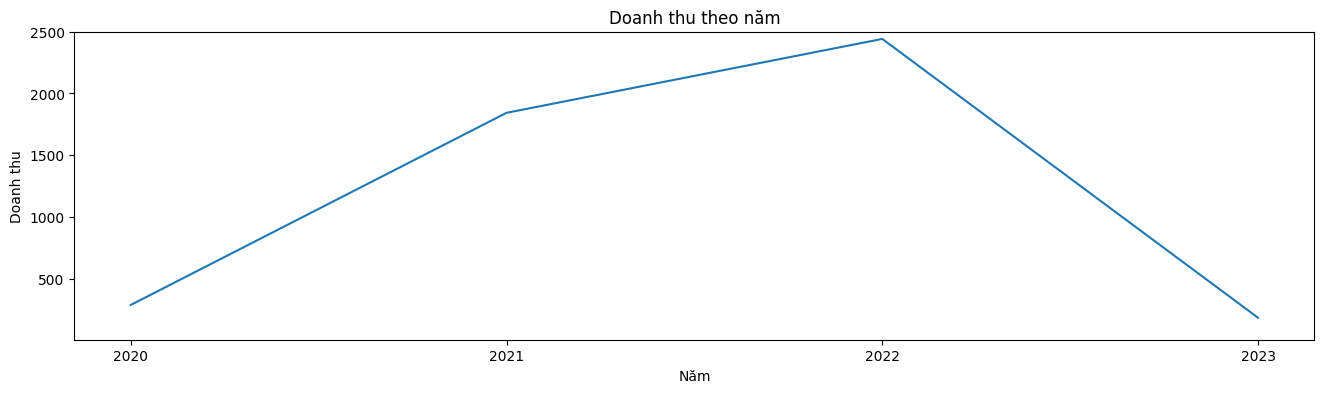

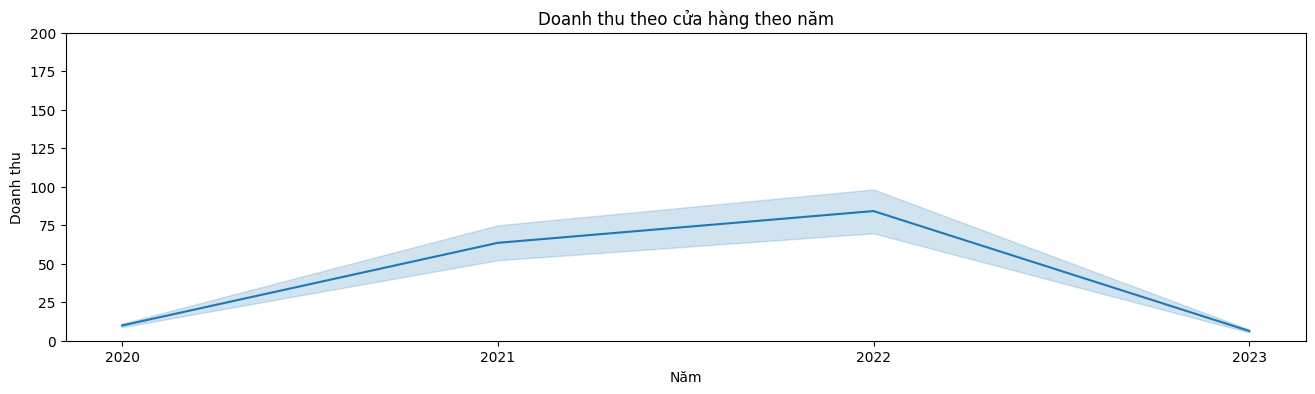

In [7]:
# biểu đồ doanh thu theo năm
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=yearly_sales_df, x='year', y='sales')
ax.set_title('Doanh thu theo năm')
ax.set_xlabel('Năm')
ax.set_ylabel('Doanh thu')

plt.xticks(yearly_sales_df['year'])
plt.ylim(5, 2500)

# biểu đồ doanh thu theo cửa hàng theo năm
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=yearly_sales_by_store_df, x='year', y='sales')
ax.set_title('Doanh thu theo cửa hàng theo năm')
ax.set_xlabel('Năm')
ax.set_ylabel('Doanh thu')

plt.xticks(yearly_sales_by_store_df['year'].unique())
plt.ylim(0, 200)

# biểu đồ doanh thu theo cửa hàng theo năm
# fig, ax = plt.subplots(figsize=(16,4))
# sns.lineplot(data=yearly_sales_by_store_df, x='year', y='sales', hue='store_key')
# ax.set_title('Doanh thu theo cửa hàng theo năm')
# ax.set_xlabel('Năm')
# ax.set_ylabel('Doanh thu')

# plt.xticks(yearly_sales_by_store_df['year'].unique())
# plt.ylim(0, 200)

plt.show()

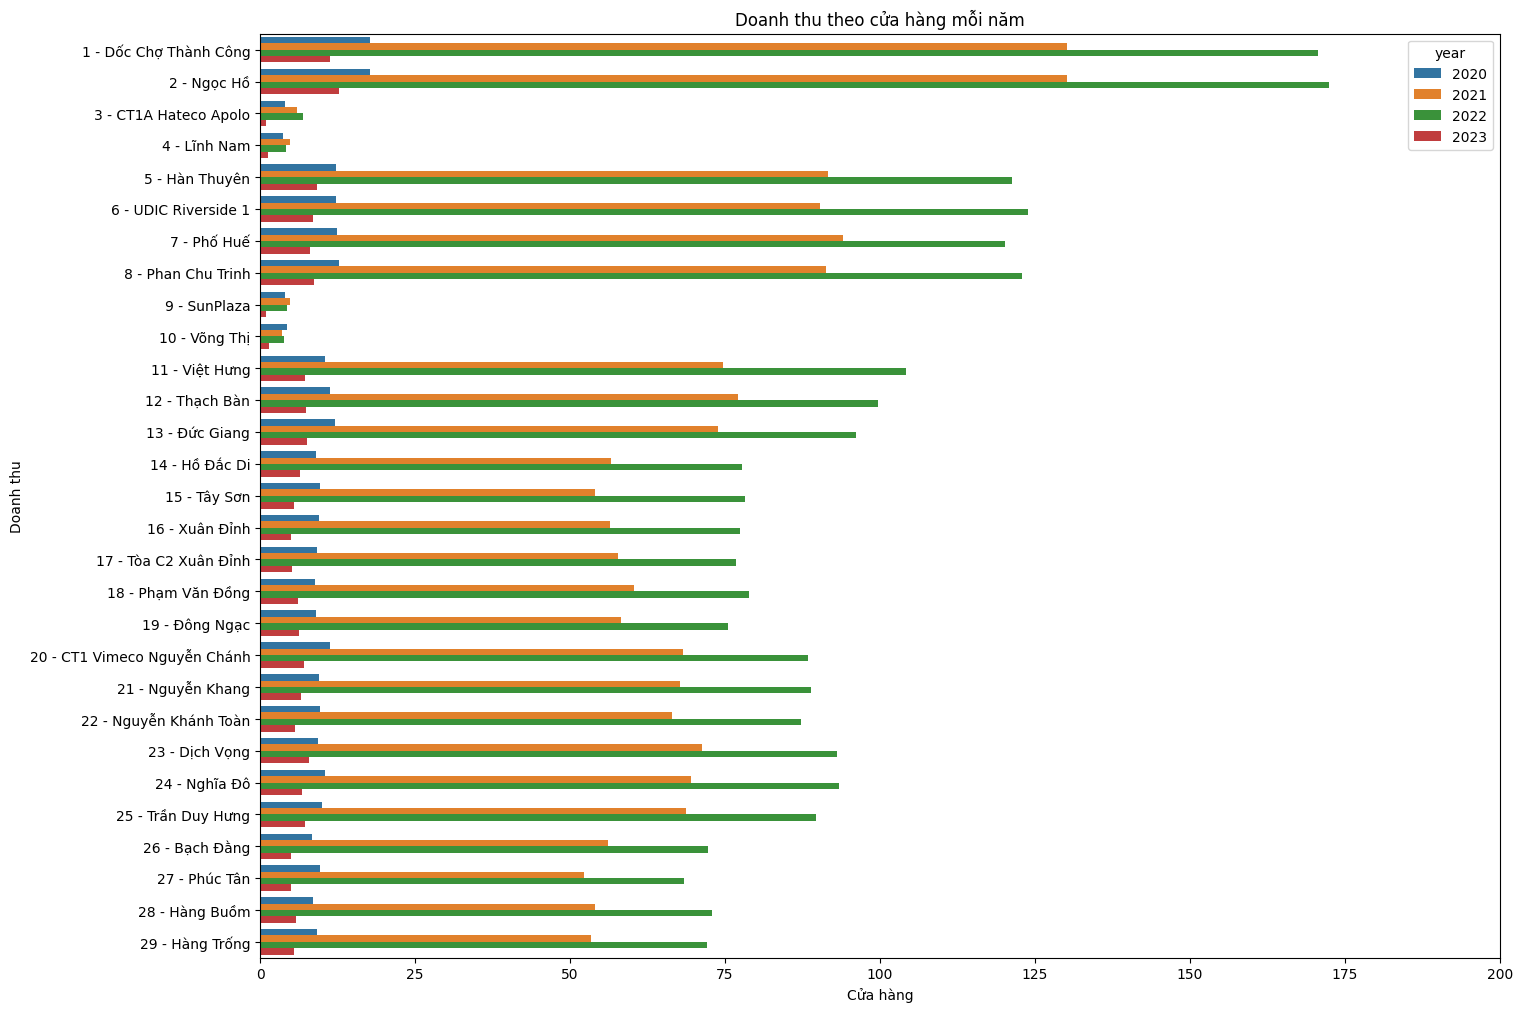

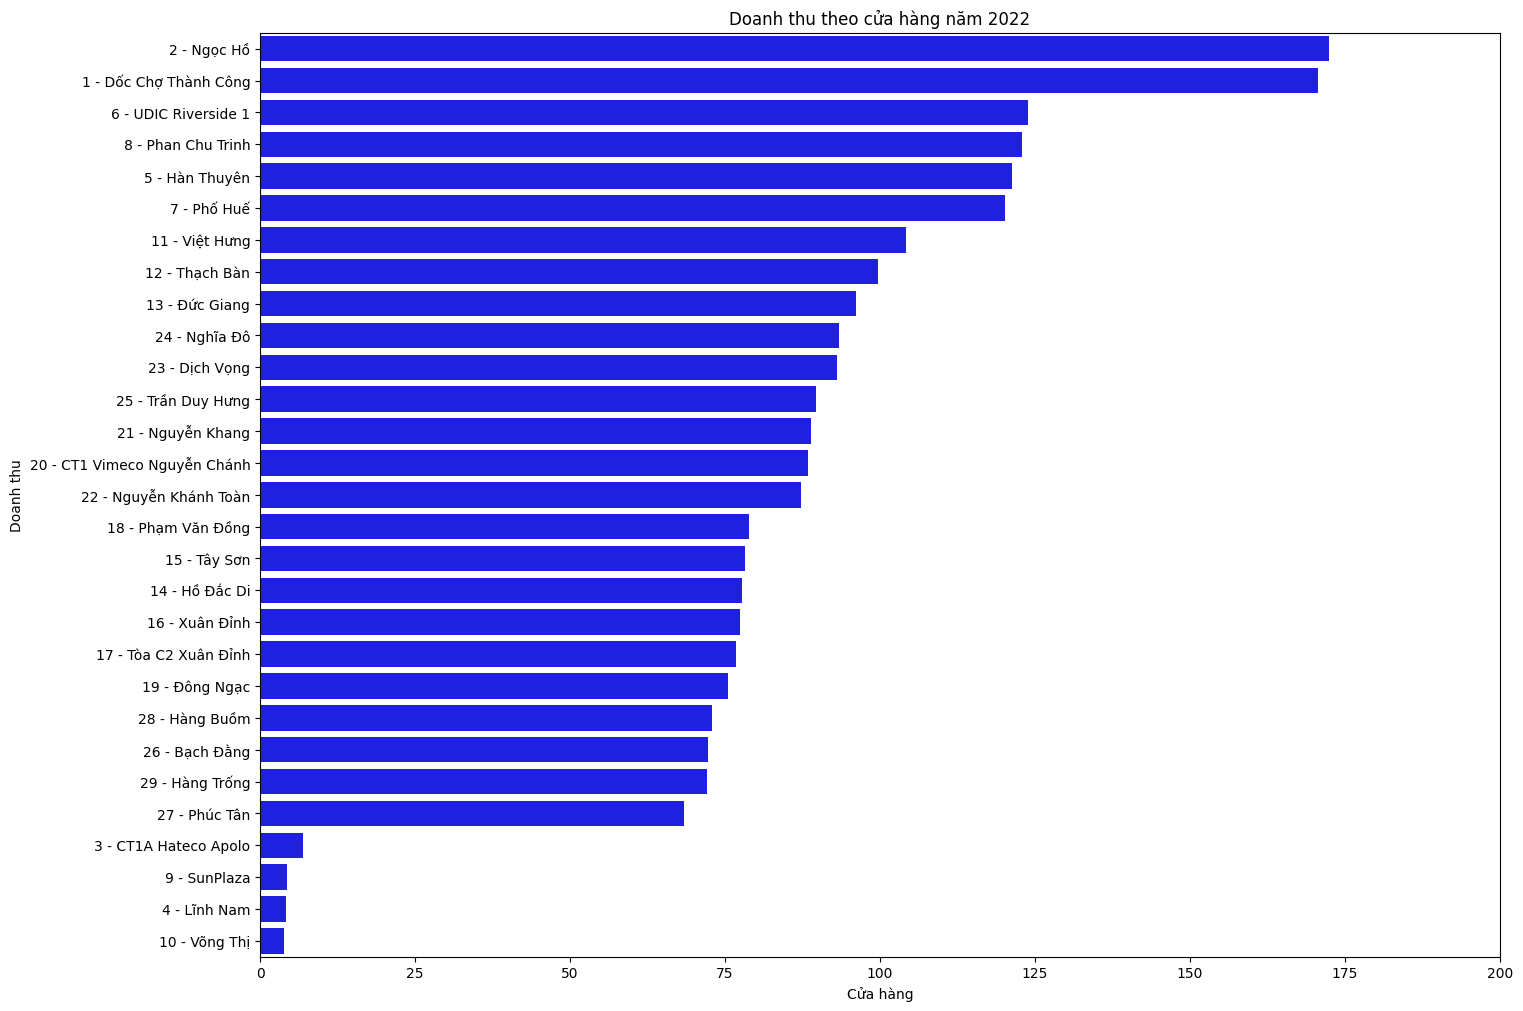

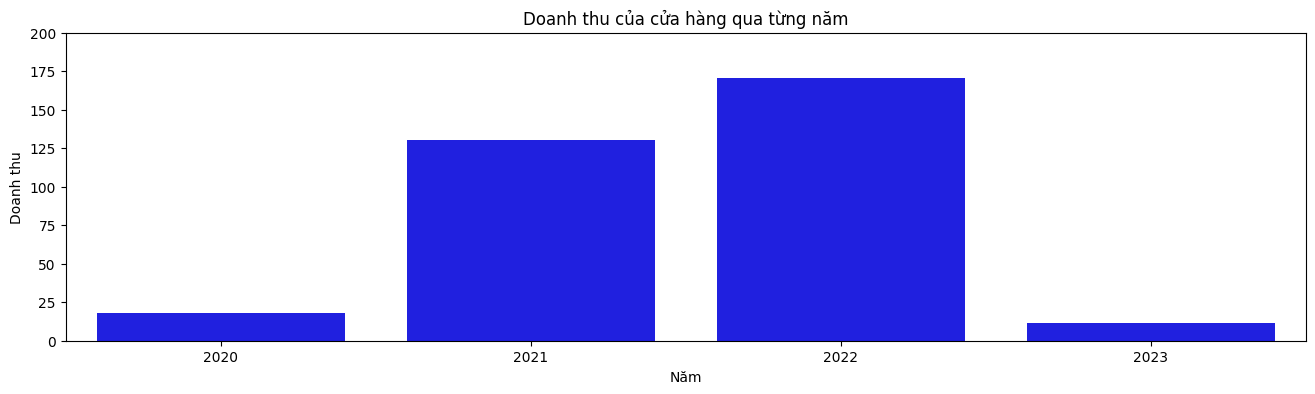

In [8]:
# biểu đồ doanh thu theo cửa hàng mỗi năm
data = yearly_sales_by_store_df
data['store_label'] = data['store_key'].map(str) + ' - ' + data['store_name'].map(str)

fig, ax = plt.subplots(figsize=(16,12))
sns.barplot(data=data, x='sales', y='store_label', hue='year')
ax.set_title(f'Doanh thu theo cửa hàng mỗi năm')
ax.set_xlabel('Cửa hàng')
ax.set_ylabel('Doanh thu')
plt.xlim(0, 200)

# biểu đồ doanh thu theo cửa hàng năm xxxx
year = 2022
data = yearly_sales_by_store_df[yearly_sales_by_store_df['year']==year].sort_values('sales', ascending=False)
data['store_label'] = data['store_key'].map(str) + ' - ' + data['store_name'].map(str)

fig, ax = plt.subplots(figsize=(16,12))
sns.barplot(data=data, x='sales', y='store_label', color='b')
ax.set_title(f'Doanh thu theo cửa hàng năm {year}')
ax.set_xlabel('Cửa hàng')
ax.set_ylabel('Doanh thu')
plt.xlim(0, 200)

# biểu đồ doanh thu của cửa hàng x qua từng năm
store_key = 1
data = yearly_sales_by_store_df[yearly_sales_by_store_df['store_key']==store_key].sort_values('year', ascending=False)

fig, ax = plt.subplots(figsize=(16, 4))
sns.barplot(data=data, x='year', y='sales', color='b')
ax.set_title(f'Doanh thu của cửa hàng qua từng năm')
ax.set_xlabel('Năm')
ax.set_ylabel('Doanh thu')
plt.ylim(0, 200)

plt.show()

# BƯỚC 2.2: PHÂN TÍCH DỮ LIỆU THEO QUÝ

# BƯỚC 2.3: PHÂN TÍCH DỮ LIỆU THEO THÁNG

## Lấy dữ liệu từ SQL Server

In [9]:
# lấy dữ liệu theo tháng
monthly_sales_data = pd.read_sql_query('''
;WITH s AS (
SELECT YEAR(order_date) AS [year], MONTH(order_date) AS [month], DATEADD(MONTH, DATEDIFF(MONTH, 0, order_date) + 1, -1) AS end_date,
    SUM(sales_amount) AS sales,
    COUNT(DISTINCT order_number) AS nb_orders
    FROM dbo.fact_retail_sales f
    GROUP BY YEAR(order_date), MONTH(order_date), DATEADD(MONTH, DATEDIFF(MONTH, 0, order_date) + 1, -1)
)
SELECT [year], [month], end_date, sales, nb_orders
FROM s
ORDER BY end_date
''', conn)
monthly_sales_df = pd.DataFrame(monthly_sales_data)
monthly_sales_df['sales'] = monthly_sales_df['sales'] / 10**9
monthly_sales_df['year_month'] =  monthly_sales_df['end_date'].dt.strftime('%Y-%m')

monthly_sales_df.head(5)

,year,month,end_date,sales,nb_orders,year_month
0,2020,1,2020-01-31,15.94,2213,2020-01
1,2020,2,2020-02-29,20.25,3123,2020-02
2,2020,3,2020-03-31,21.76,3503,2020-03
3,2020,4,2020-04-30,21.40,3402,2020-04
4,2020,5,2020-05-31,23.37,3647,2020-05


In [10]:
# lấy dữ liệu của từng cửa hàng theo tháng
monthly_sales_by_store_data = pd.read_sql_query('''
;WITH sales AS (
SELECT  YEAR(order_date) AS [year], MONTH(order_date) AS [month], DATEADD(MONTH, DATEDIFF(MONTH, 0, order_date) + 1, -1) AS end_date, store_key,
    SUM(sales_amount) AS sales,
    COUNT(DISTINCT order_number) AS nb_orders
    FROM dbo.fact_retail_sales f
    GROUP BY YEAR(order_date), MONTH(order_date), DATEADD(MONTH, DATEDIFF(MONTH, 0, order_date) + 1, -1), store_key
)
SELECT [year], [month], end_date, s.store_key, REPLACE(s.store, 'KPIM Mart ', '') AS store_name, sales, nb_orders,
-- SUM(sales OVER(PARTITION BY [year]) AS total_sales,
-- SUM(nb_orders) OVER(PARTITION BY [year]) AS total_nb_orders,
ROUND(sales * 1.0 / SUM(sales) OVER(PARTITION BY [year], [end_date]), 4) AS sales_ratio,
ROUND(nb_orders * 1.0 / SUM(nb_orders) OVER(PARTITION BY [year], [end_date]), 4) AS nb_orders_ratio
FROM sales
JOIN dbo.dim_store s ON sales.store_key = s.store_key
ORDER BY [year], [month], end_date, s.store_key
''', conn)
monthly_sales_by_store_df = pd.DataFrame(monthly_sales_by_store_data)
monthly_sales_by_store_df['sales'] = monthly_sales_by_store_df['sales'] / 10**9
monthly_sales_by_store_df['year_month'] =  monthly_sales_by_store_df['end_date'].dt.strftime('%Y-%m')
# monthly_sales_by_store_df['end_date'] = monthly_sales_by_store_df['end_date'].dt.strftime('%Y-%m-%d')
monthly_sales_by_store_df.head(5)

,year,month,end_date,store_key,store_name,sales,nb_orders,sales_ratio,nb_orders_ratio,year_month
0,2020,1,2020-01-31,1,Dốc Chợ Thành Công,0.48,110,0.03,0.05,2020-01
1,2020,1,2020-01-31,2,Ngọc Hồ,1.47,112,0.09,0.05,2020-01
2,2020,1,2020-01-31,3,CT1A Hateco Apolo,0.29,52,0.02,0.02,2020-01
3,2020,1,2020-01-31,4,Lĩnh Nam,0.29,48,0.02,0.02,2020-01
4,2020,1,2020-01-31,5,Hàn Thuyên,0.76,90,0.05,0.04,2020-01


## Vẽ biểu đồ

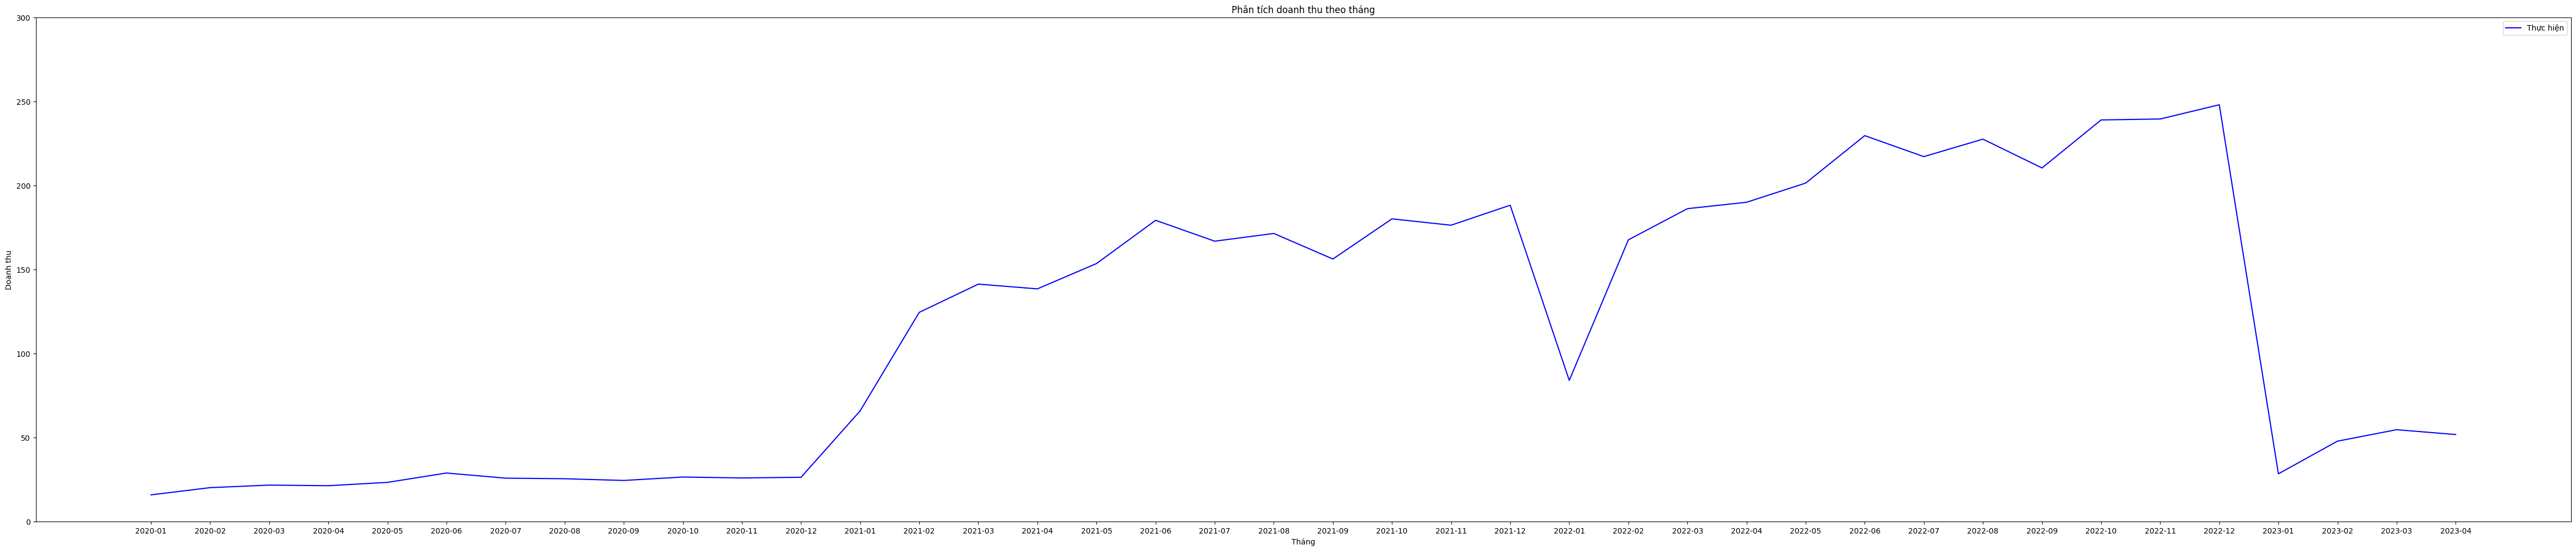

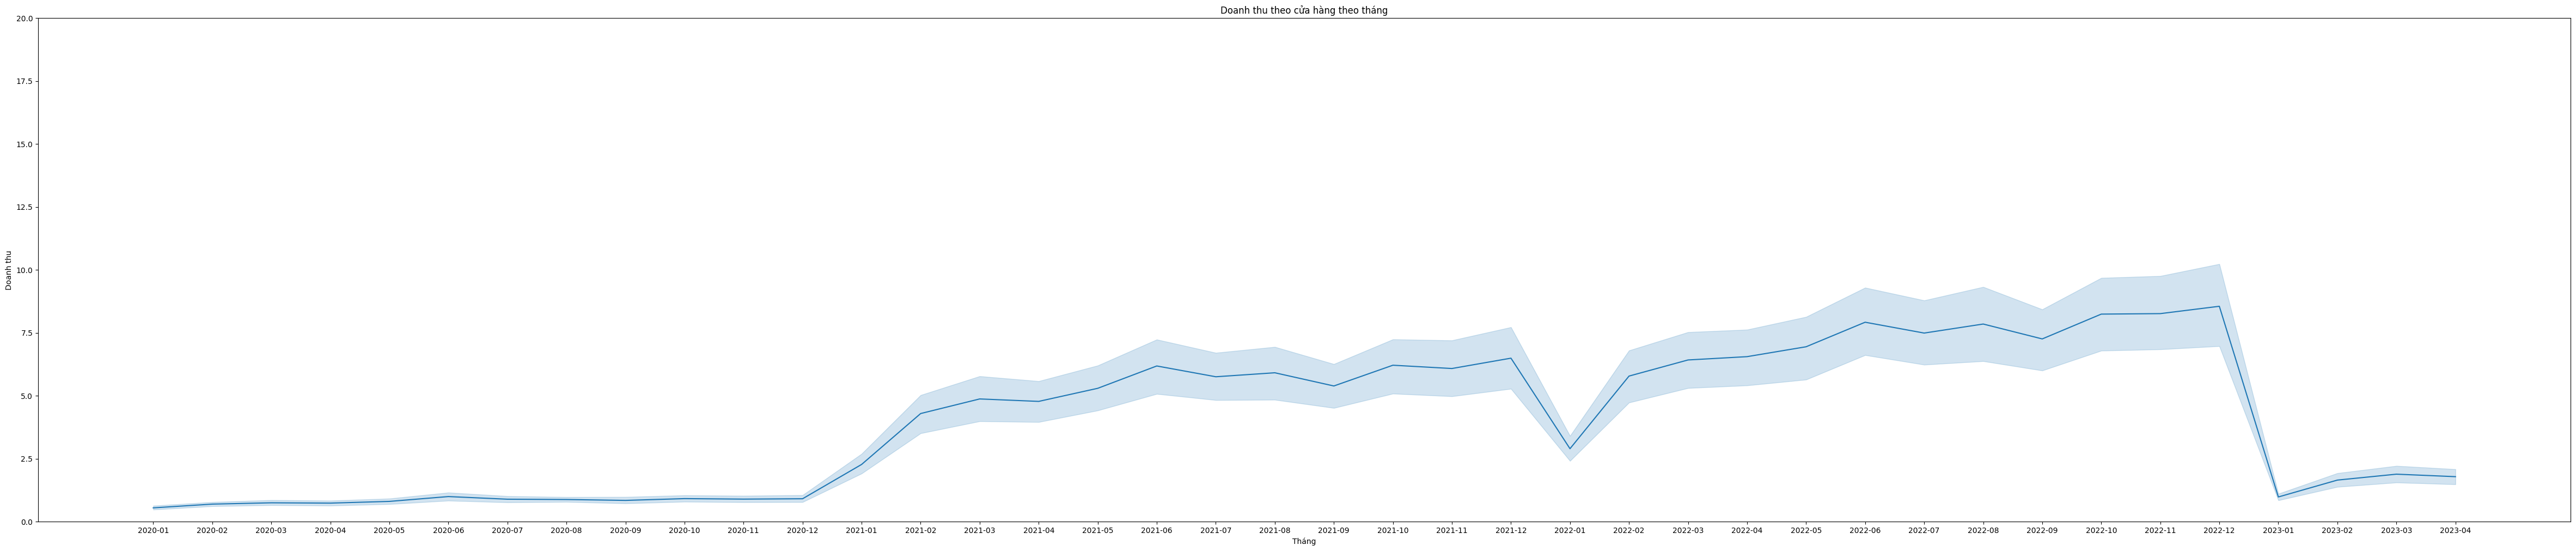

In [11]:
# biểu đồ doanh thu theo tháng
df = monthly_sales_df

fig, ax = plt.subplots(figsize=(60,12))
actual_line = sns.lineplot(data=df, x='year_month', y='sales',  label='Thực hiện',  color='blue')
actual_line.legend()

ax.set_title('Phân tích doanh thu theo tháng')
ax.set_xlabel('Tháng')
ax.set_ylabel('Doanh thu')
plt.ylim(0, 300)
plt.xticks(monthly_sales_df['year_month'].unique())

# biểu đồ doanh thu theo cửa hàng theo tháng
df = monthly_sales_by_store_df

fig, ax = plt.subplots(figsize=(60,12))
sns.lineplot(data=df, x='year_month', y='sales')
ax.set_title('Doanh thu theo cửa hàng theo tháng')
ax.set_xlabel('Tháng')
ax.set_ylabel('Doanh thu')
plt.ylim(0, 20)
plt.xticks(monthly_sales_by_store_df['year_month'].unique())

# biểu đồ doanh thu theo cửa hàng theo tháng
# fig, ax = plt.subplots(figsize=(60,12))
# sns.lineplot(data=data, x='year_month', y='sales', hue='store_key')
# ax.set_title('Doanh thu theo cửa hàng theo tháng')
# ax.set_xlabel('Tháng')
# ax.set_ylabel('Doanh thu')
# plt.ylim(0, 20)
# plt.xticks(monthly_sales_by_store_df['year_month'].unique())

plt.show()

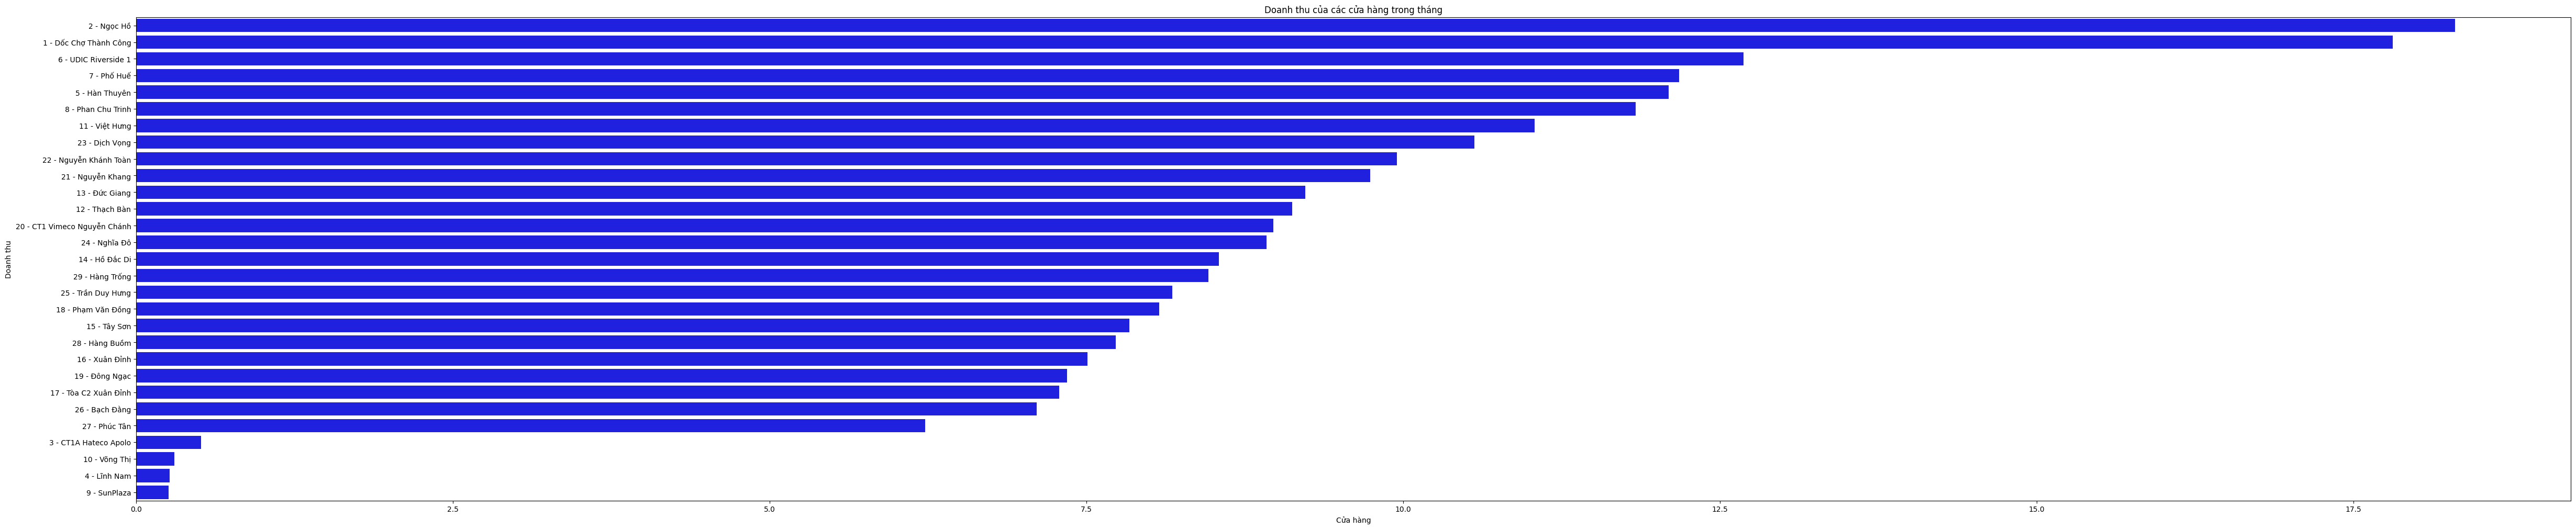

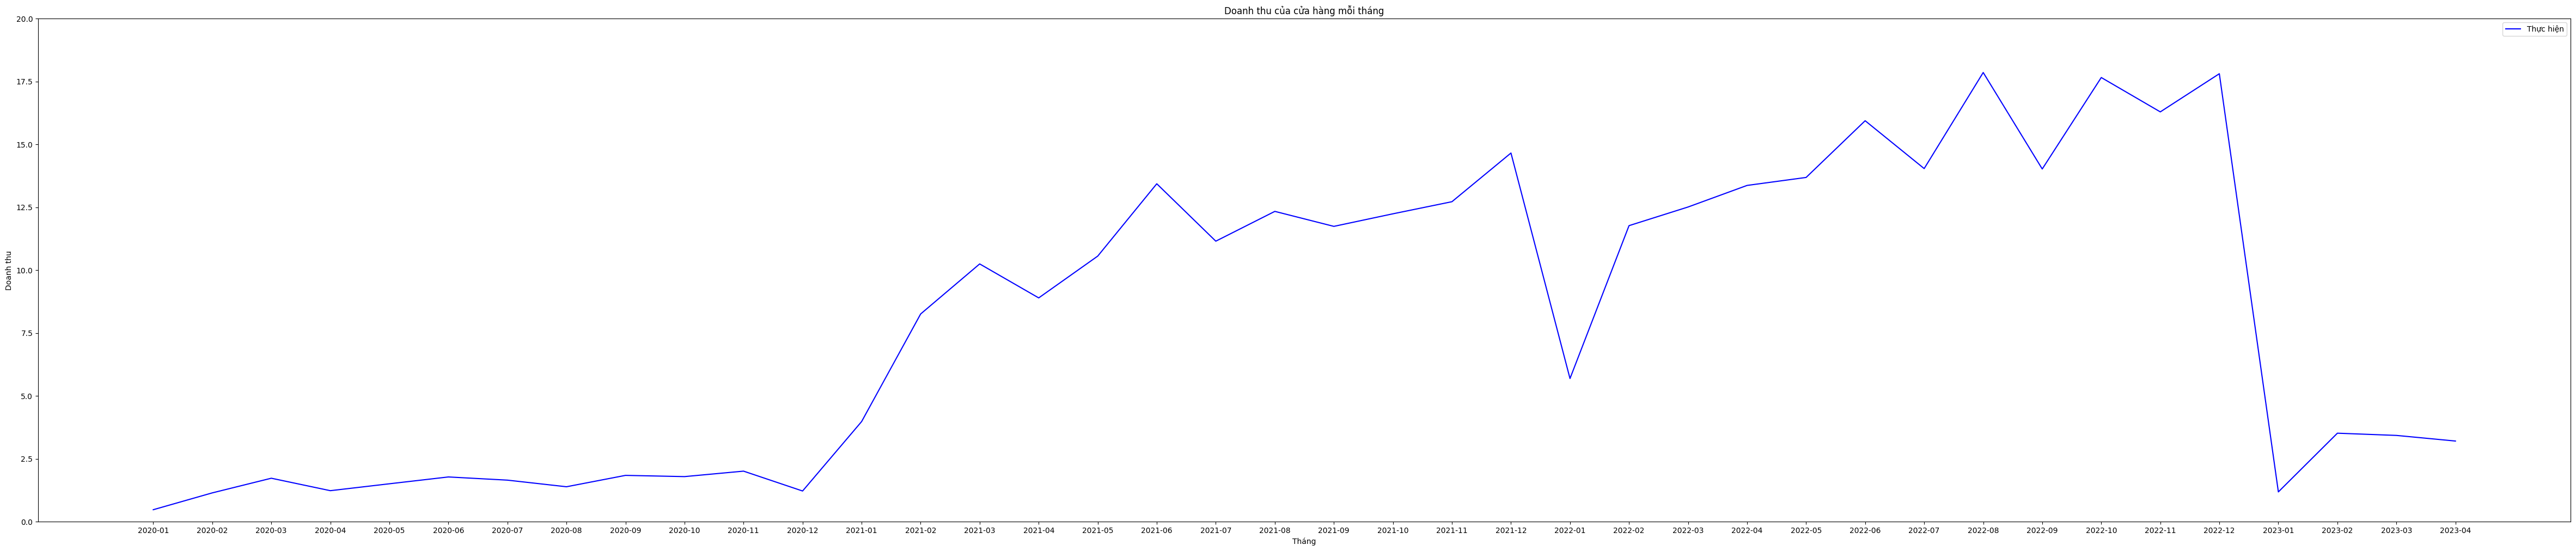

In [12]:
# biểu đồ doanh thu của các cửa hàng 12 tháng trong năm x
# year = 2022
# data = monthly_sales_by_store_df[monthly_sales_by_store_df['year']==year].sort_values('end_date', ascending=False)
# data['store_label'] = data['store_key'].map(str) + ' - ' + data['store_name'].map(str)
# data['year_month'] =  data['end_date'].dt.strftime('%Y-%m')

# fig, ax = plt.subplots(figsize=(60,36))
# sns.barplot(data=data, x='sales', y='store_label', hue='year_month')
# ax.set_title(f'Doanh thu của các cửa hàng trong tháng')
# ax.set_xlabel('Cửa hàng')
# ax.set_ylabel('Doanh thu')

# biểu đồ doanh thu của các cửa hàng trong tháng x
end_date = '2022-12-31'
df = monthly_sales_by_store_df[monthly_sales_by_store_df['end_date']==end_date].sort_values('sales', ascending=False)
df['store_label'] = df['store_key'].map(str) + ' - ' + df['store_name'].map(str)

fig, ax = plt.subplots(figsize=(60,12))
sns.barplot(data=df, x='sales', y='store_label', color='b')
ax.set_title(f'Doanh thu của các cửa hàng trong tháng')
ax.set_xlabel('Cửa hàng')
ax.set_ylabel('Doanh thu')

# biểu đồ doanh thu cửa hàng x mỗi tháng
store_key = 1
df = monthly_sales_by_store_df[monthly_sales_by_store_df['store_key']==store_key].sort_values('end_date')
df['store_label'] = df['store_key'].map(str) + ' - ' + df['store_name'].map(str)

fig, ax = plt.subplots(figsize=(60, 12))
sns.lineplot(data=df, x='year_month', y='sales', label='Thực hiện', color='b')
ax.set_title(f'Doanh thu của cửa hàng mỗi tháng')
ax.set_xlabel('Tháng')
ax.set_ylabel('Doanh thu')
plt.ylim(0, 20)

plt.show()



# BƯỚC 2.4: KIỂM TRA TÍNH DỪNG (STATIONARY)

## Kiểm tra tính dừng với Augmented Dickey-Fuller (ADF)

In [13]:
print(monthly_sales_df.describe())

         year  month  sales  nb_orders
count   40.00  40.00  40.00      40.00
mean  2021.20   6.10 118.86   18513.33
std      0.99   3.55  82.46   12921.80
min   2020.00   1.00  15.94    2213.00
25%   2020.00   3.00  26.53    4042.50
50%   2021.00   6.00 139.96   22193.00
75%   2022.00   9.00 186.79   29113.25
max   2023.00  12.00 248.10   38932.00


In [14]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

def check_stationarity(df):
    test_df = adfuller(df)
    adf = test_df[0]
    pvalue = test_df[1]
    critical_value = test_df[4]['5%']
    print('ADF Statistic: %f' % adf)
    print('p-value: %f' % pvalue)
    if (pvalue < 0.05) and (adf < critical_value):
        print('Đây là chuỗi có tính dừng')
    else:
        print('Đây là chuỗi không có tính dừng')

In [15]:
df = monthly_sales_df[monthly_sales_df['year'].isin([2020, 2021, 2022])]
check_stationarity(df['sales'])

ADF Statistic: -0.637426
p-value: 0.862299
Đây là chuỗi không có tính dừng


## Biến đổi chuỗi không dừng sang chuỗi dừng (Non-stationary Transformation)

Biến đổi sang chuỗi mới bằng cách lấy hiệu giữa 2 thời điểm liên tiếp

d(t) = y(t) - y(t-1)

Biến đổi sang chuỗi mới bằng sử dụng log

l(t) = log(y(t) / y(t-1))

In [16]:
from numpy import sqrt, log

def difference_transform(df):
    df = df.copy()
    diff_df = df.copy()

    df['t-1'] = df.shift(1)['t']
    diff_df['t'] = df['t'] - df['t-1']
    diff_df['t'] = diff_df['t'].fillna(0)
    diff_df['t-1'] = diff_df.shift(1)['t']
    diff_df['t-1'] = diff_df['t-1'].fillna(0)

    return diff_df

def log_transform(df):
    df = df.copy()
    log_df = df.copy()

    df['t-1'] = df.shift(1)['t']
    log_df['t'] = log(df['t']) - log(df['t-1'])
    log_df['t'] = log_df['t'].fillna(0)
    log_df['t-1'] = log_df.shift(1)['t']
    log_df['t-1'] = log_df['t-1'].fillna(0)

    return log_df

In [17]:
df = monthly_sales_df[monthly_sales_df['year'].isin([2020, 2021, 2022])]
# df['t-2'] = df.shift(2)['sales']
df['t-1'] = df.shift(1)['sales']
df['t'] = df['sales']
df['t-1'] = df['t-1'].fillna(0)
check_stationarity(df['t'])

diff_df = difference_transform(df)
check_stationarity(diff_df['t'])

log_df = log_transform(df)
check_stationarity(log_df['t'])

df['y(t)'] = df['sales']
df = pd.concat([df, diff_df[['t']].rename(columns = {'t':'d(t)'})], axis=1)
df = pd.concat([df, log_df[['t']].rename(columns = {'t':'l(t)'})], axis=1)

# df['y(t-1)'] = df.shift(1)['sales']
# df['y(t)'] = df['sales']

ADF Statistic: -0.637426
p-value: 0.862299
Đây là chuỗi không có tính dừng
ADF Statistic: -7.826530
p-value: 0.000000
Đây là chuỗi có tính dừng
ADF Statistic: -5.991418
p-value: 0.000000
Đây là chuỗi có tính dừng


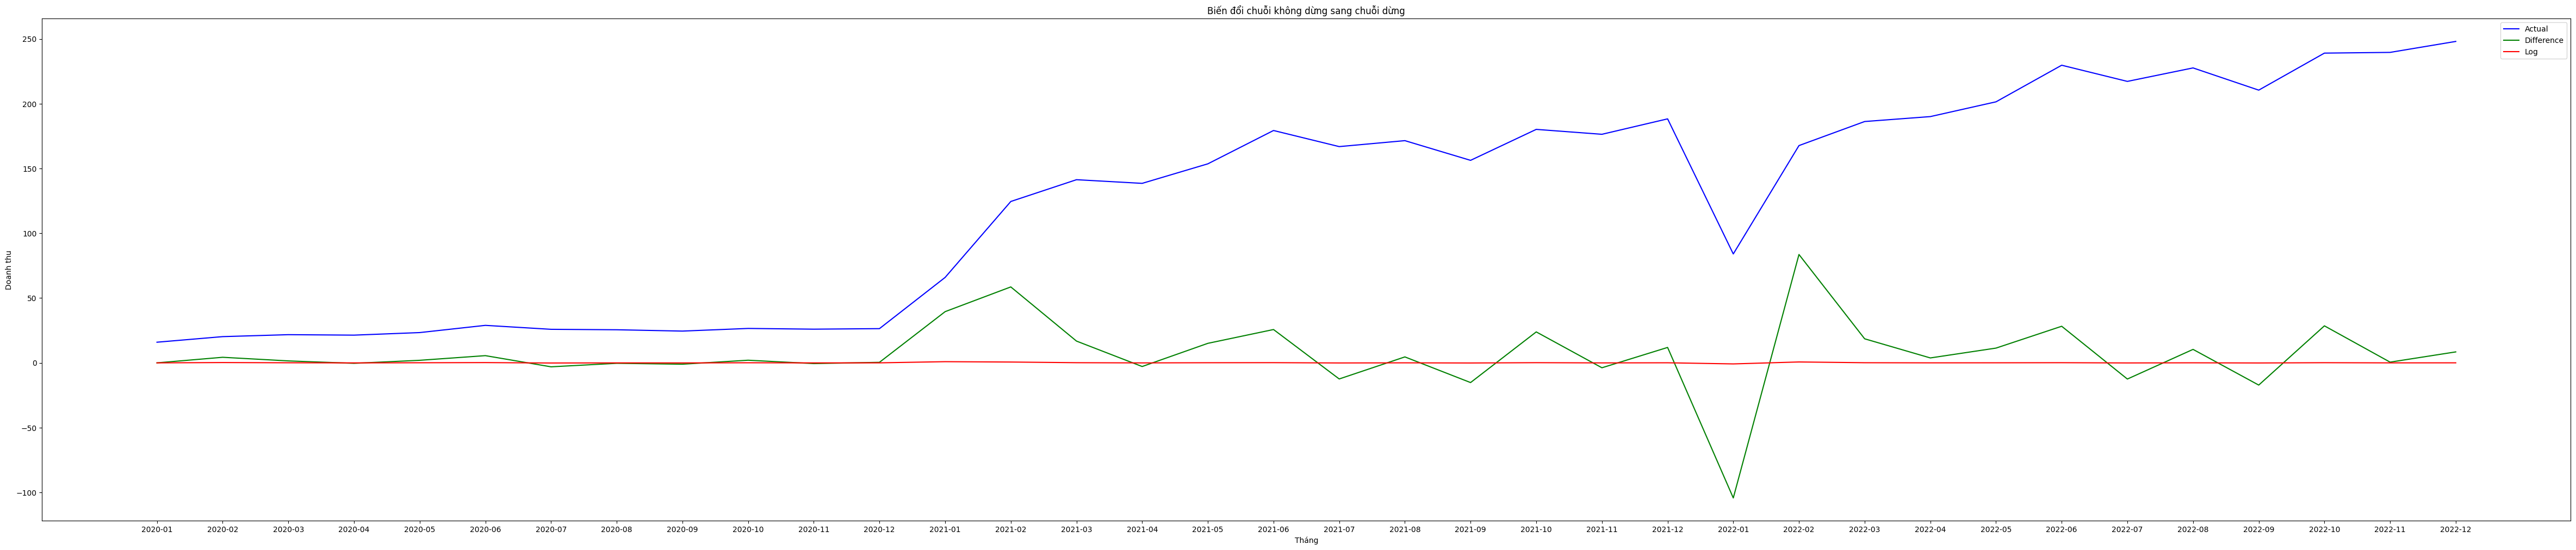

In [18]:
fig, ax = plt.subplots(figsize=(60,12))
y_line = sns.lineplot(data=df, x='year_month', y='y(t)',  label='Actual',  color='blue')
y_line.legend()

d_line = sns.lineplot(data=df, x='year_month', y='d(t)',  label='Difference',  color='green')
d_line.legend()

l_line = sns.lineplot(data=df, x='year_month', y='l(t)',  label='Log',  color='red')
l_line.legend()
ax.set_title(f'Biến đổi chuỗi không dừng sang chuỗi dừng')
ax.set_xlabel('Tháng')
ax.set_ylabel('Doanh thu')
# plt.ylim(-100, 100)
plt.xticks(df['year_month'].unique())

plt.show()

# BƯỚC 2.5: PHÂN TÍCH YẾU TỐ MÙA VỤ (SEASONALITY)

## Sử dụng dữ liệu lịch sử trong năm 2020, 2021, 2022 tính chỉ số mùa vụ (seasonal factor) cho 12 tháng trong năm

Tính doanh thu trung bình từng tháng trong năm.

Ví dụ: Doanh thu trung bình của tháng 1 sẽ bằng tổng doanh thu của tháng 1 trong 3 năm 2020, 2021, 2022 chia cho 3

Tính doanh thu trung bình tổng thể bằng tổng doanh thu trung bình tháng của 12 tháng chia cho 12

Yếu tố mùa vụ của từng tháng bằng doanh thu trung bình của tháng đó chia cho doanh thu trung bình tổng thể



In [19]:
# lấy dữ liệu theo năm
monthly_seasonal_factor_data = pd.read_sql_query('''
;WITH sales AS (
SELECT YEAR(order_date) AS [year], MONTH(order_date) AS [month],
    DATEADD(MONTH, DATEDIFF(MONTH, 0, order_date) + 1, -1) AS end_date,
    SUM(sales_amount) AS sales,
    COUNT(DISTINCT order_number) AS nb_orders
    FROM dbo.fact_retail_sales f
    WHERE YEAR(order_date) IN (2020, 2021, 2022)
    GROUP BY YEAR(order_date), MONTH(order_date), DATEADD(MONTH, DATEDIFF(MONTH, 0, order_date) + 1, -1)
), m AS (
SELECT [month], SUM(sales) / COUNT([year]) AS avg_sales
    FROM sales
    GROUP BY [month]
)
SELECT [month],
-- avg_sales, SUM(avg_sales) OVER() / 12 AS avg_total_sales,
ROUND(avg_sales / (SUM(avg_sales) OVER() / 12), 4) AS seasonal_factor
FROM m
ORDER BY [month]
''', conn)
monthly_seasonal_factor_df = pd.DataFrame(monthly_seasonal_factor_data)
monthly_seasonal_factor_df

,month,seasonal_factor
0,1,0.44
1,2,0.82
2,3,0.92
3,4,0.92
4,5,0.99
5,6,1.15
6,7,1.08
7,8,1.11
8,9,1.03
9,10,1.17


## Xây dựng chuỗi thời gian được điều chỉnh theo mùa vụ (Seasonally Adjusted Time Series)

In [20]:
def seasonally_adjusted_transform(df):
    sa_df = df.copy()
    sa_df = pd.merge(sa_df, monthly_seasonal_factor_df, how="left", on="month")
    sa_df['t'] = sa_df['t'] / sa_df['seasonal_factor']
    sa_df['t-1'] = sa_df.shift(1)['t']
    sa_df['t-1'] = sa_df['t-1'].fillna(0)

    return sa_df

In [21]:
df = monthly_sales_df[monthly_sales_df['year'].isin([2020, 2021, 2022])]
df['t-1'] = df.shift(1)['sales']
df['t-1'] = df['t-1'].fillna(0)
df['t'] = df['sales']
check_stationarity(df['t'])

diff_df = difference_transform(df)
check_stationarity(diff_df['t'])

sa_df = seasonally_adjusted_transform(df)
check_stationarity(sa_df['t'])

dsa_df = difference_transform(sa_df)
check_stationarity(dsa_df['t'])

df['y(t)'] = df['sales']
df = pd.concat([df, diff_df[['t']].rename(columns = {'t':'d(t)'})], axis=1)
df = pd.concat([df, sa_df[['t']].rename(columns = {'t':'sa(t)'})], axis=1)
df = pd.concat([df, dsa_df[['t']].rename(columns = {'t':'dsa(t)'})], axis=1)

df.head()

ADF Statistic: -0.637426
p-value: 0.862299
Đây là chuỗi không có tính dừng
ADF Statistic: -7.826530
p-value: 0.000000
Đây là chuỗi có tính dừng
ADF Statistic: -0.986786
p-value: 0.758053
Đây là chuỗi không có tính dừng
ADF Statistic: -5.850989
p-value: 0.000000
Đây là chuỗi có tính dừng


,year,month,end_date,sales,nb_orders,year_month,t-1,t,y(t),d(t),sa(t),dsa(t)
0,2020,1,2020-01-31,15.94,2213,2020-01,0.00,15.94,15.94,0.00,36.60,0.00
1,2020,2,2020-02-29,20.25,3123,2020-02,15.94,20.25,20.25,4.31,24.68,-11.92
2,2020,3,2020-03-31,21.76,3503,2020-03,20.25,21.76,21.76,1.51,23.72,-0.96
3,2020,4,2020-04-30,21.40,3402,2020-04,21.76,21.40,21.40,-0.36,23.29,-0.43
4,2020,5,2020-05-31,23.37,3647,2020-05,21.40,23.37,23.37,1.97,23.53,0.24


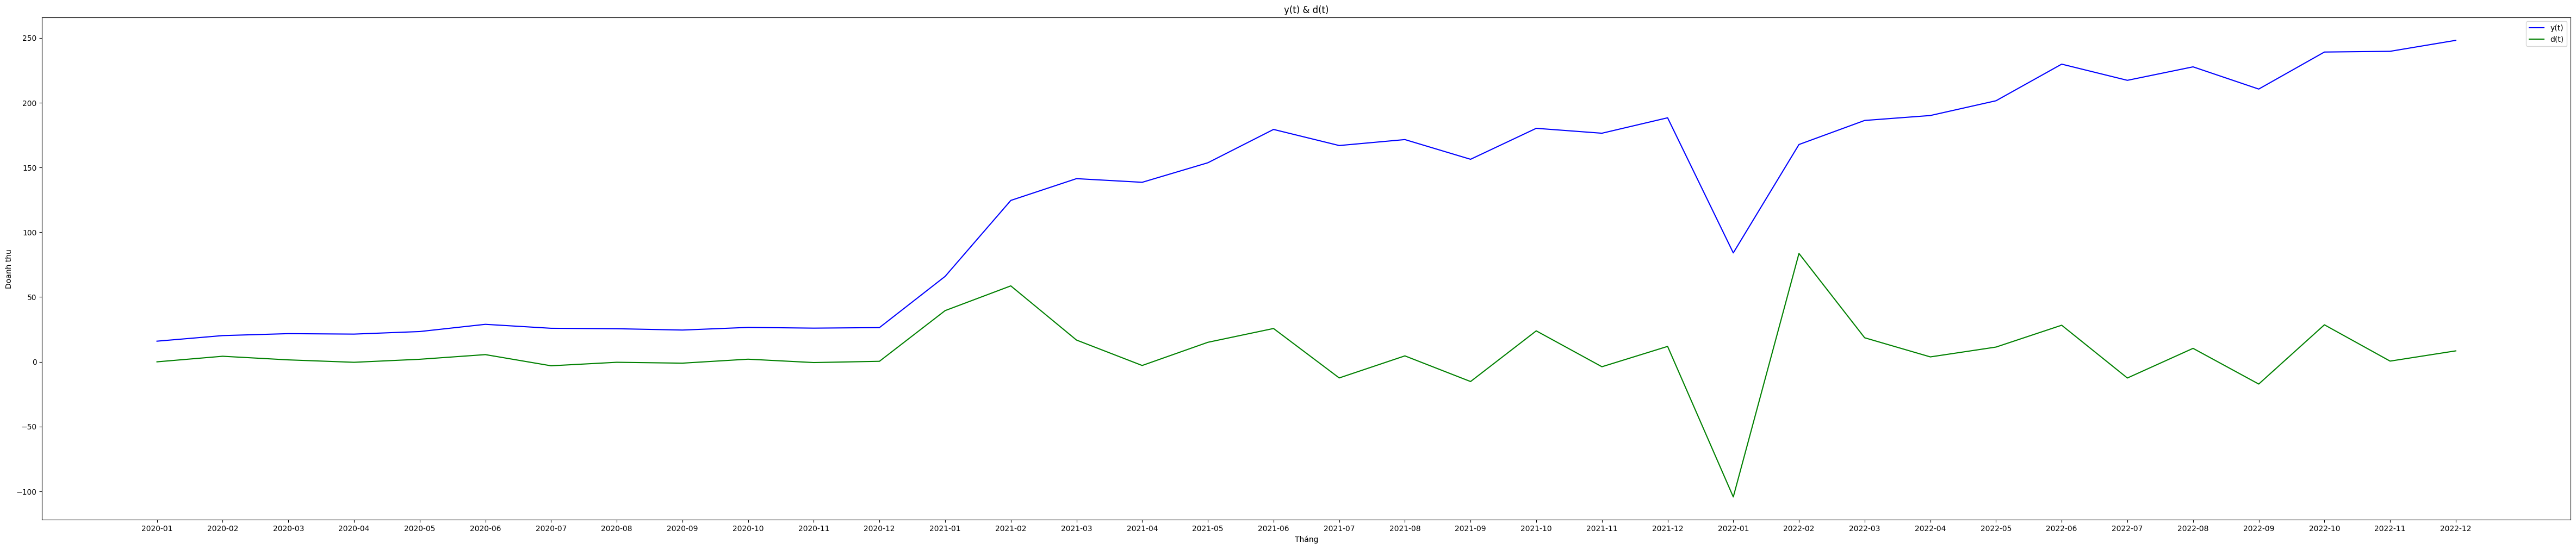

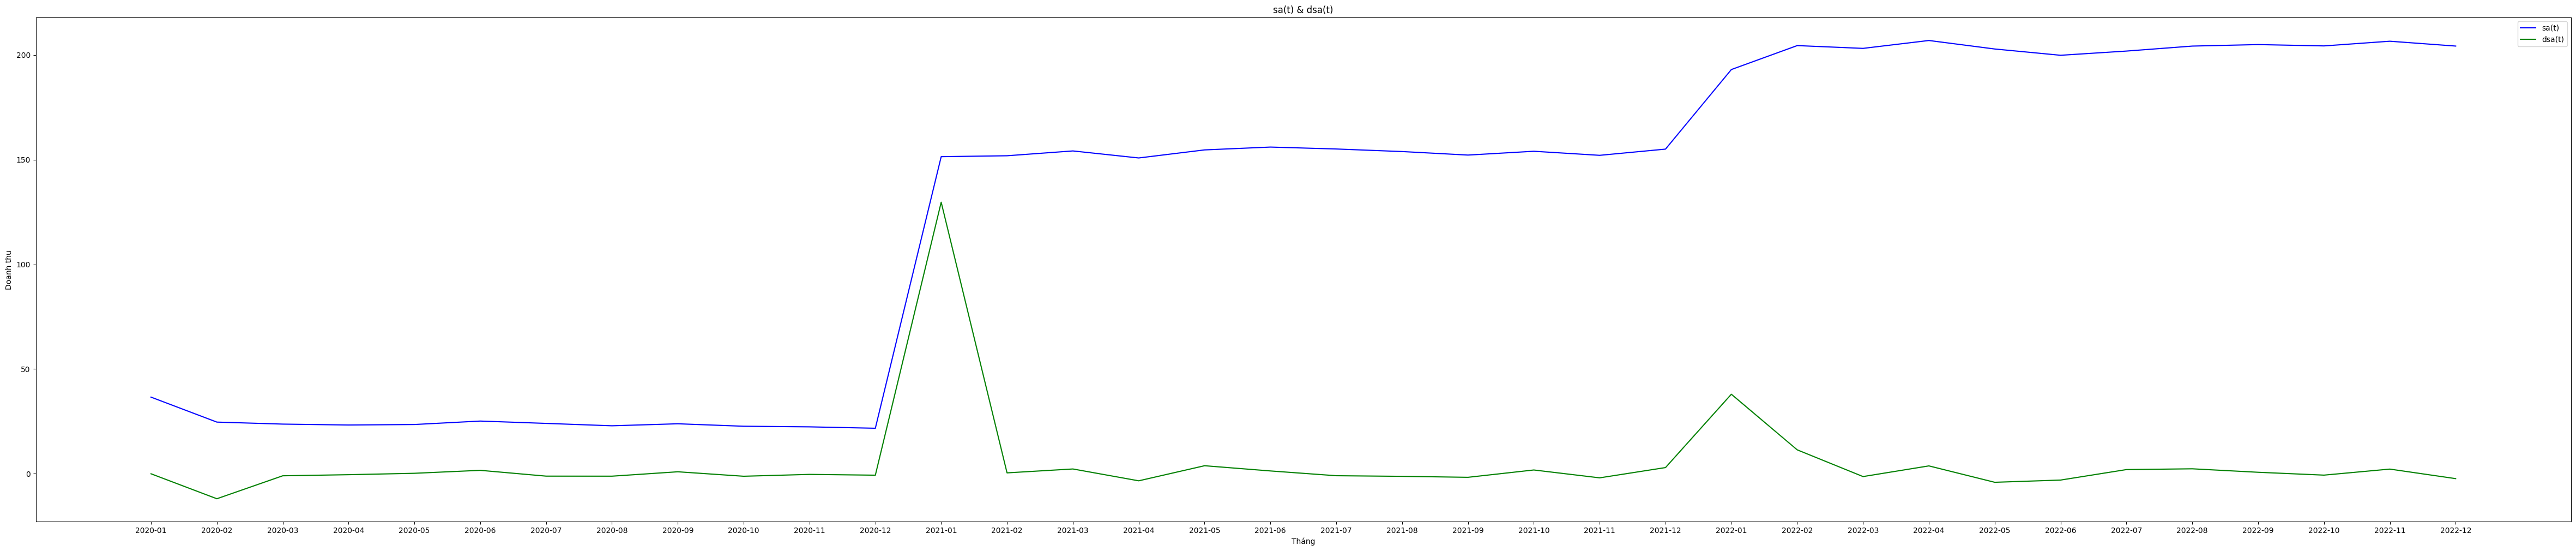

In [22]:
fig, ax = plt.subplots(figsize=(60,12))
y_line = sns.lineplot(data=df, x='year_month', y='y(t)',  label='y(t)',  color='blue')
y_line.legend()

diff_line = sns.lineplot(data=df, x='year_month', y='d(t)',  label='d(t)',  color='green')
diff_line.legend()

ax.set_title(f'y(t) & d(t)')
ax.set_xlabel('Tháng')
ax.set_ylabel('Doanh thu')
# plt.ylim(-100, 100)
plt.xticks(df['year_month'].unique())

fig, ax = plt.subplots(figsize=(60,12))

sa_line = sns.lineplot(data=df, x='year_month', y='sa(t)',  label='sa(t)',  color='blue')
sa_line.legend()

dsa_line = sns.lineplot(data=df, x='year_month', y='dsa(t)',  label='dsa(t)',  color='green')
dsa_line.legend()
ax.set_title(f'sa(t) & dsa(t)')
ax.set_xlabel('Tháng')
ax.set_ylabel('Doanh thu')
# plt.ylim(-100, 100)
plt.xticks(df['year_month'].unique())

plt.show()

# BƯỚC 3: PHÂN TÍCH DỰ BÁO CHUỖI THỜI GIAN



In [23]:
dataset = monthly_sales_df
dataset['t'] = dataset['sales']
dataset['actual'] = dataset['sales']

train = dataset[dataset['year'].isin([2020, 2021, 2022])]
train_size = len(train)
train_y = [train['actual'][i] for i in range(train_size)]
# history_y = train_y

test = dataset[dataset['year'].isin([2023])]
test = test.reset_index()
test_size = len(test)
test_y = [test['actual'][i] for i in range(test_size)]

print(f'Train Size: {train_size}')
print(f'Test Size: {test_size}')

print(train_y)
print(test_y)

Train Size: 36
Test Size: 4
[15.941524885, 20.246567949, 21.756144733, 21.398939355, 23.373329789, 28.944363738, 25.896051549, 25.549272833, 24.525562604, 26.567864942, 26.003508694, 26.41808897, 65.948287303, 124.565244393, 141.37312769, 138.553518966, 153.623204743, 179.350678337, 166.923943534, 171.518974117, 156.314375481, 180.213990362, 176.425936335, 188.334302529, 84.06767287, 167.711738507, 186.281257054, 190.086689561, 201.484444956, 229.736766528, 217.251363942, 227.653352944, 210.506970827, 239.080772595, 239.639801834, 248.104562254]
[28.479738716, 47.91654414, 54.728750616, 51.853865681]


# BƯỚC 3.1: ĐO LƯỜNG TÍNH CHÍNH XÁC CỦA CÁC PHƯƠNG PHÁP DỰ BÁO

MSE - Sai số bình phương trung bình (mean square error)

MSE = SUM OF SQUARE OF FORECASTING ERRORS / NUMBER OF FORECASTS

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_forecasting_model(df):
    mse = sqrt(mean_squared_error(df['t'], df['t_forecast']))
    print('MSE: %.3f' % mse)

# BƯỚC 3.2: PHƯƠNG PHÁP DỰ BÁO GIÁ TRỊ CUỐI CÙNG (LAST - VALUE FORECASTING METHOD)

Train MSE: 28.00744776746943
Test MSE: 110.30358520878777


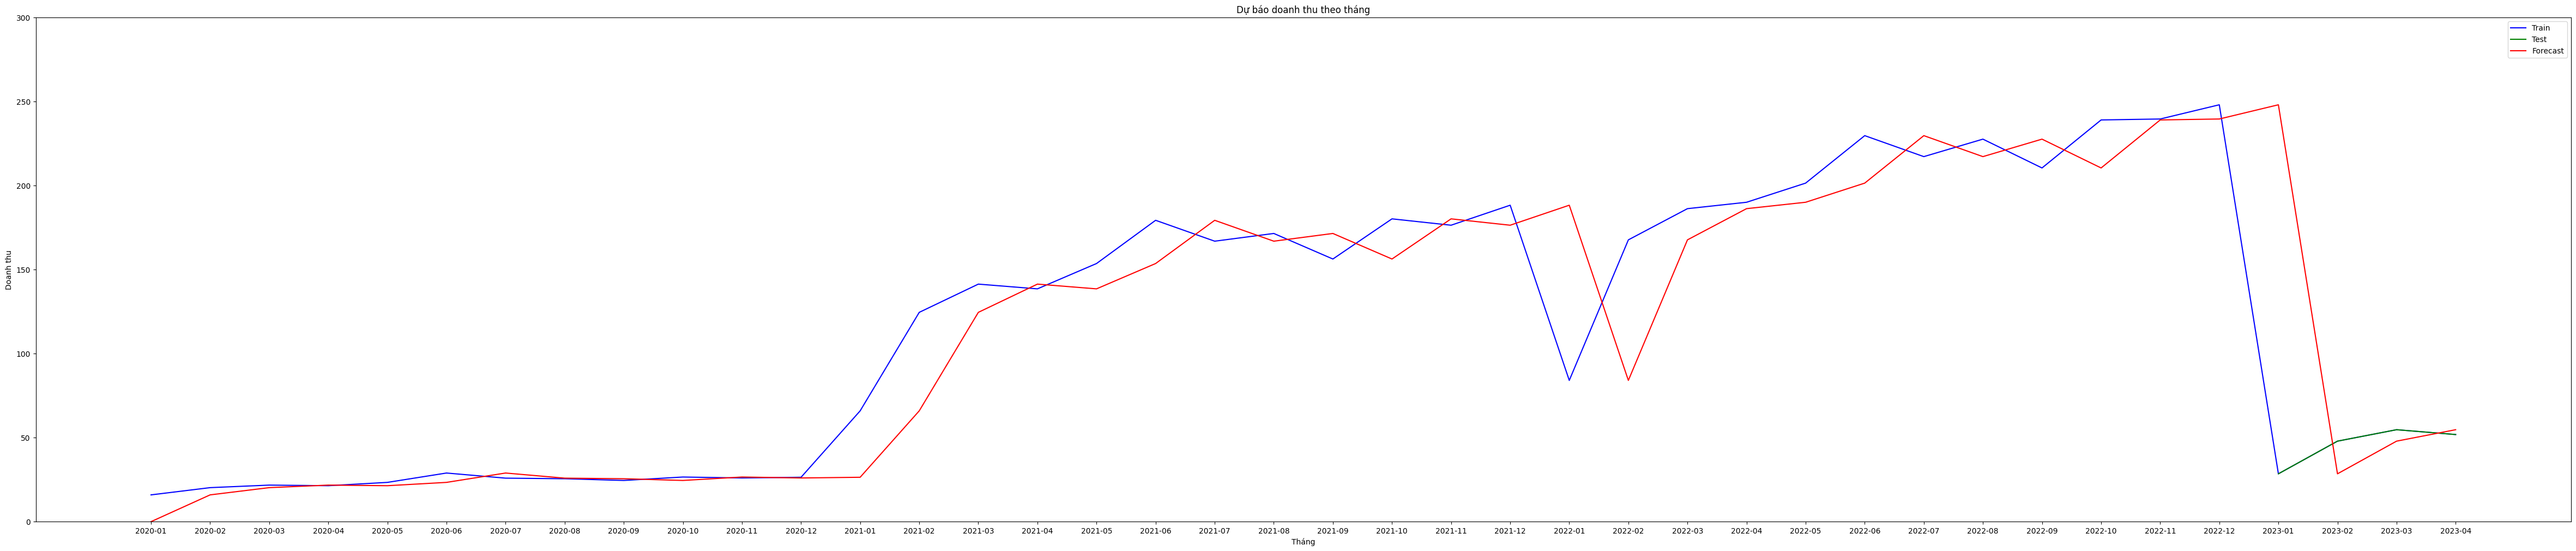

   year  month   end_date  sales  nb_orders year_month     t  actual  forecast
0  2020      1 2020-01-31  15.94       2213    2020-01 15.94   15.94      0.00
1  2020      2 2020-02-29  20.25       3123    2020-02 20.25   20.25     15.94
2  2020      3 2020-03-31  21.76       3503    2020-03 21.76   21.76     20.25
3  2020      4 2020-04-30  21.40       3402    2020-04 21.40   21.40     21.76
4  2020      5 2020-05-31  23.37       3647    2020-05 23.37   23.37     21.40


In [25]:
def last_value_forecast_model():
    history = list()
    forecasts = list()

    # chạy thử trên tập train
    for t in range(train_size):
        if t == 0:
            y_forecast = 0
        else:
            y_forecast = history[len(history)-1]
        forecasts.append(y_forecast)
        history.append(train_y[t])

    mse = sqrt(mean_squared_error(train_y, forecasts[0: train_size]))
    print(f'Train MSE: {mse}')

    # chạy mô hình dự báo cho tập test
    for t in range(test_size):
        y_forecast = history[len(history)-1]
        forecasts.append(y_forecast)
        history.append(test_y[t])

    mse = sqrt(mean_squared_error(test_y, forecasts[train_size : train_size + test_size]))
    print(f'Test MSE: {mse}')

    forecast = pd.DataFrame(forecasts)
    forecast.columns = ['forecast']
    forecast = pd.concat([dataset, forecast], axis=1)

    # vẽ biểu đồ
    fig, ax = plt.subplots(figsize=(60,12))
    actual_line = sns.lineplot(data=dataset, x='year_month', y='actual', label='Train',  color='blue')
    actual_line.legend()

    test_line = sns.lineplot(data=test, x='year_month', y='actual', label='Test',  color='green')
    test_line.legend()

    forecast_line = sns.lineplot(data=forecast, x='year_month', y='forecast', label='Forecast',  color='red')
    forecast_line.legend()

    ax.set_title('Dự báo doanh thu theo tháng')
    ax.set_xlabel('Tháng')
    ax.set_ylabel('Doanh thu')
    plt.ylim(0, 300)

    plt.show()
    print(forecast.head())

    # return forecast

last_value_forecast_model()

Train Size: 36
Test Size: 4
Train MSE: 28.00744776746943
Test MSE: 110.30358520878777


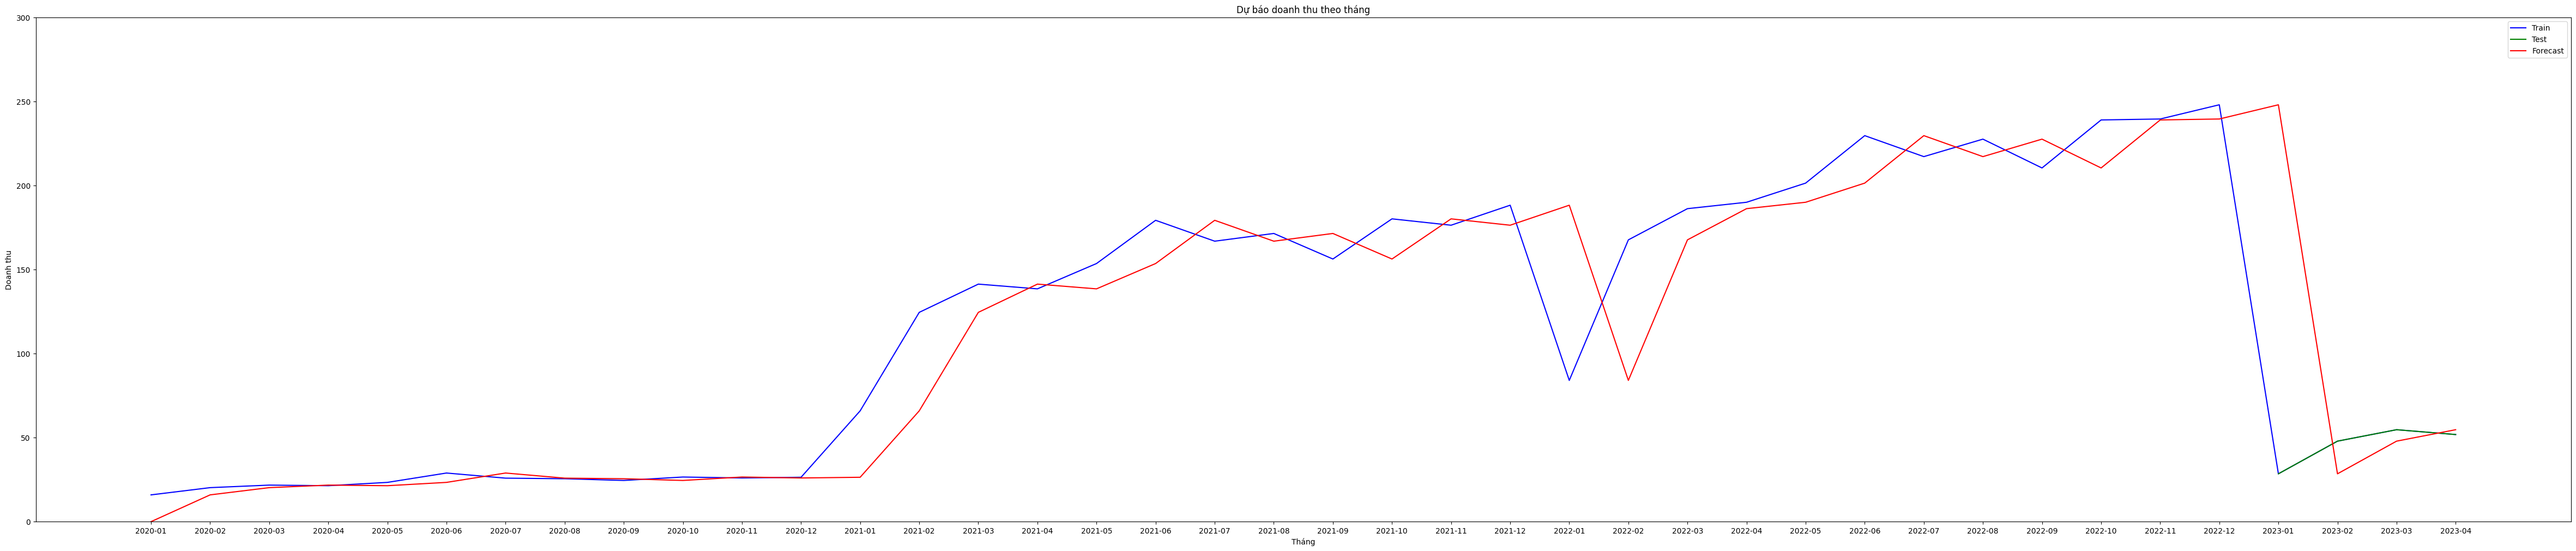

Train Size: 36
Test Size: 4
Train MSE: 10.594823428419405
Test MSE: 30.41216659895319


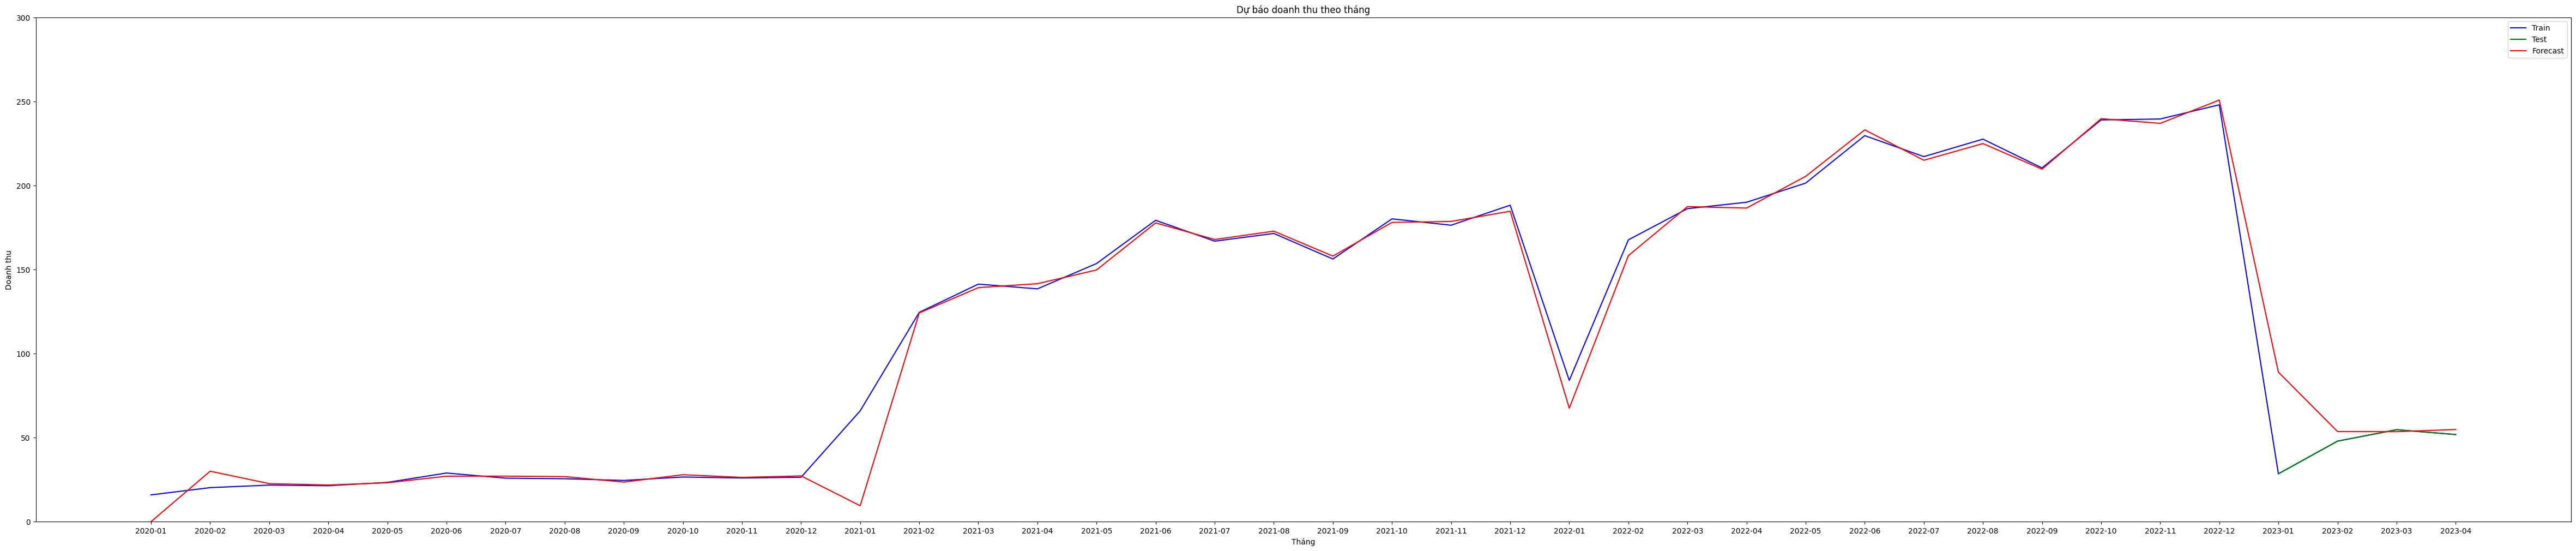

In [26]:
def last_value_forecast_model2(dataset):
    dataset = dataset.copy()

    train = dataset[dataset['year'].isin([2020, 2021, 2022])]
    train_size = len(train)
    train_y = [train['t'][i] for i in range(train_size)]

    test = dataset[dataset['year'].isin([2023])]
    test = test.reset_index()
    test_size = len(test)
    test_y = [test['t'][i] for i in range(test_size)]

    print(f'Train Size: {train_size}')
    print(f'Test Size: {test_size}')

    history = list()
    forecasts = list()

    # chạy thử trên tập train
    for t in range(train_size):
        if t == 0:
            y_forecast = 0
        else:
            y_forecast = history[len(history)-1]
        forecasts.append(y_forecast)
        history.append(train_y[t])

    # chạy mô hình dự báo cho tập test
    for t in range(test_size):
        y_forecast = history[len(history)-1]
        forecasts.append(y_forecast)
        history.append(test_y[t])

    forecast = pd.DataFrame(forecasts)
    forecast.columns = ['t_forecast']
    forecast = pd.concat([dataset, forecast], axis=1)

    if 'seasonal_factor' in forecast.columns:
        forecast['forecast'] = forecast['t_forecast'] * forecast['seasonal_factor']
    else:
         forecast['forecast'] = forecast['t_forecast']

    forecast['forecast'] = forecast['forecast'].fillna(0)

    mse = sqrt(mean_squared_error(forecast['actual'][0: train_size], forecast['forecast'][0: train_size]))
    print(f'Train MSE: {mse}')
    mse = sqrt(mean_squared_error(forecast['actual'][train_size : train_size + test_size], forecast['forecast'][train_size : train_size + test_size]))
    print(f'Test MSE: {mse}')

    # vẽ biểu đồ
    fig, ax = plt.subplots(figsize=(60,12))
    actual_line = sns.lineplot(data=dataset, x='year_month', y='actual', label='Train',  color='blue')
    actual_line.legend()

    test_line = sns.lineplot(data=test, x='year_month', y='actual', label='Test',  color='green')
    test_line.legend()

    forecast_line = sns.lineplot(data=forecast, x='year_month', y='forecast', label='Forecast',  color='red')
    forecast_line.legend()

    ax.set_title('Dự báo doanh thu theo tháng')
    ax.set_xlabel('Tháng')
    ax.set_ylabel('Doanh thu')
    plt.ylim(0, 300)

    plt.show()
    # print(forecast.head())
    # return forecast

last_value_forecast_model2(dataset)
sa_dataset = seasonally_adjusted_transform(dataset)
last_value_forecast_model2(sa_dataset)

In [ ]:
# diff_df = difference_transform(df)
# forecast_diff_df = fit_last_value_forecasting_model(diff_df)

# df2 = df.copy()
# df2 = pd.concat([df2, forecast_diff_df[['t']].rename(columns = {'t':'d(t)'})], axis=1)
# df2 = pd.concat([df2, forecast_diff_df[['t_forecast']].rename(columns = {'t_forecast':'d(t)_forecast'})], axis=1)
# df2['t_forecast'] = df2['t-1'] + df2['d(t)_forecast']
# evaluate_forecasting_model(df2)
# plot_last_value_forecasting_model(df2)
# df2.head()

# BƯỚC 3.3: PHƯƠNG PHÁP DỰ BÁO TRUNG BÌNH TRƯỢT (SMA - SIMPLE MOVING AVERAGE)

Cách tính Moving Average

ma(t) = mean(obs(t − 2), obs(t − 1), obs(t))

Các dự báo cho thời điểm kế tiếp

forecast(t) = mean(obs(t − 3), obs(t − 2), obs(t - 1))

## Sử dụng Moving Average để trích chọn đặc trưng

In [27]:
df = monthly_sales_df[monthly_sales_df['year'].isin([2020, 2021, 2022])]
df['t'] = df['sales']

window_size = 3
window = df['t'].rolling(window=window_size, min_periods=1)
means = window.mean()
means = means.rename(f'sma{window_size}')
df = pd.concat([df, means], axis = 1)

# window_size = 6
# window = df['t'].rolling(window=window_size, min_periods=1)
# means = window.mean()
# means = means.rename(f'sma{window_size}')
# df = pd.concat([df, means], axis = 1)

window_size = 12
window = df['t'].rolling(window=window_size, min_periods=1)
means = window.mean()
means = means.rename(f'sma{window_size}')
df = pd.concat([df, means], axis = 1)

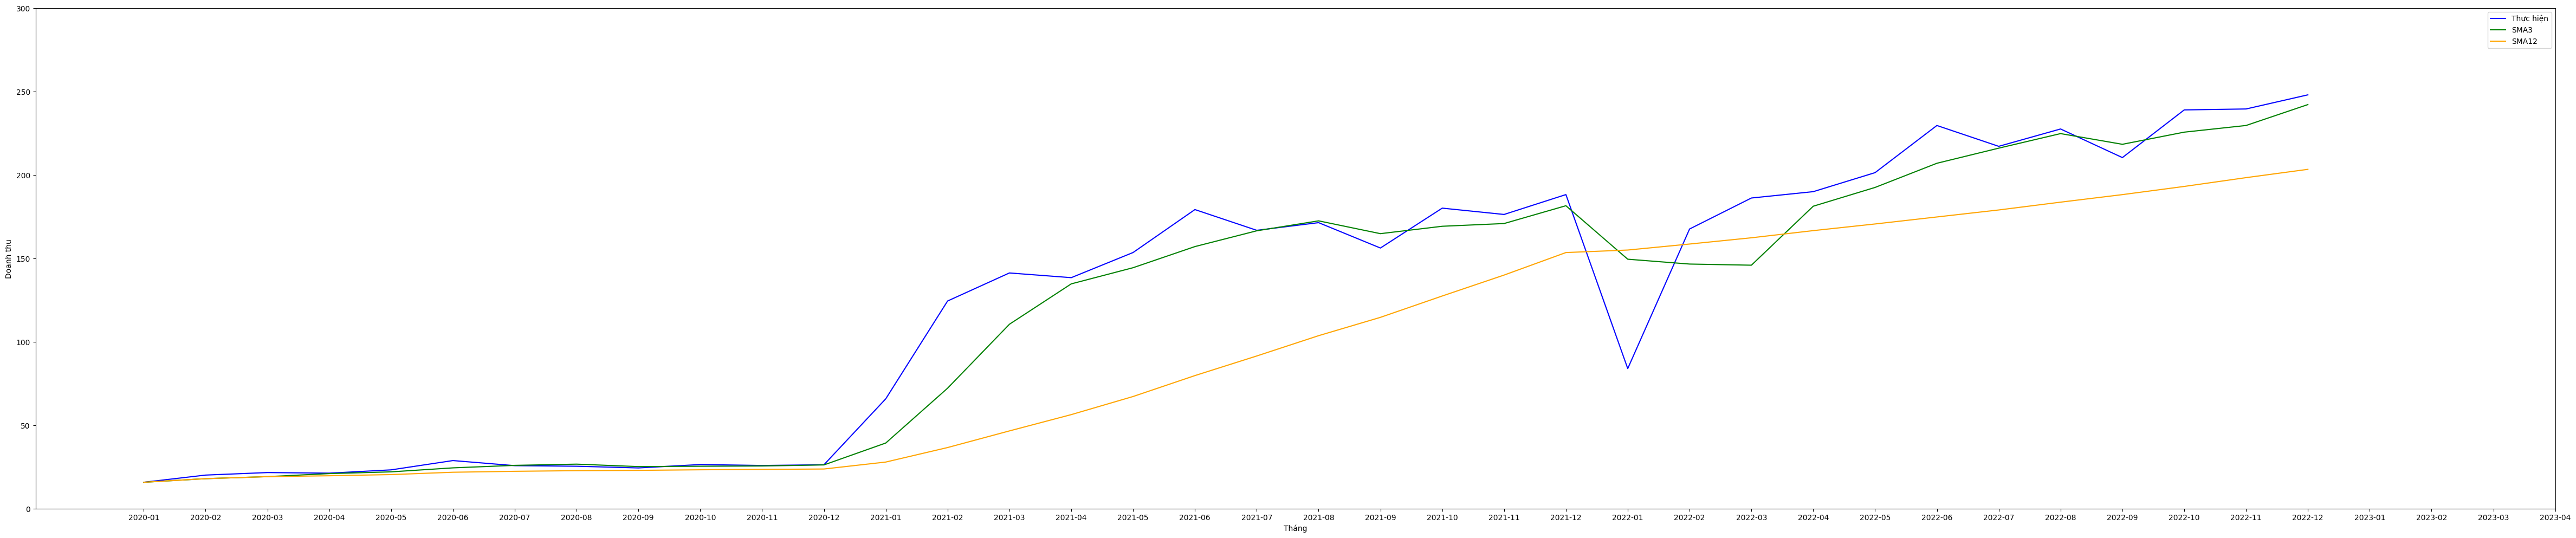

,year,month,end_date,sales,nb_orders,year_month,t,actual,sma3,sma12
0,2020,1,2020-01-31,15.94,2213,2020-01,15.94,15.94,15.94,15.94
1,2020,2,2020-02-29,20.25,3123,2020-02,20.25,20.25,18.09,18.09
2,2020,3,2020-03-31,21.76,3503,2020-03,21.76,21.76,19.31,19.31
3,2020,4,2020-04-30,21.40,3402,2020-04,21.40,21.40,21.13,19.84
4,2020,5,2020-05-31,23.37,3647,2020-05,23.37,23.37,22.18,20.54


In [28]:
fig, ax = plt.subplots(figsize=(60,12))
actual_line = sns.lineplot(data=df, x='year_month', y='sales',  label='Thực hiện',  color='blue')
actual_line.legend()

sm3_line = sns.lineplot(data=df, x='year_month', y='sma3',  label='SMA3',  color='green')
sm3_line.legend()

# sm6_line = sns.lineplot(data=df, x='year_month', y='sma6',  label='SMA6',  color='red')
# sm6_line.legend()

sm12_line = sns.lineplot(data=df, x='year_month', y='sma12',  label='SMA12',  color='orange')
sm12_line.legend()

ax.set_title('')
ax.set_xlabel('Tháng')
ax.set_ylabel('Doanh thu')
plt.ylim(0, 300)
plt.xticks(monthly_sales_df['year_month'].unique())

plt.show()
df.head()

## Xây dựng mô hình dự báo

Train Size: 36
Test Size: 4
Window Size: 3
Train MSE: 30.630884338543154
Test MSE: 126.53623159223459
Window Size: 12
Train MSE: 53.166308525088176
Test MSE: 147.70815648276997


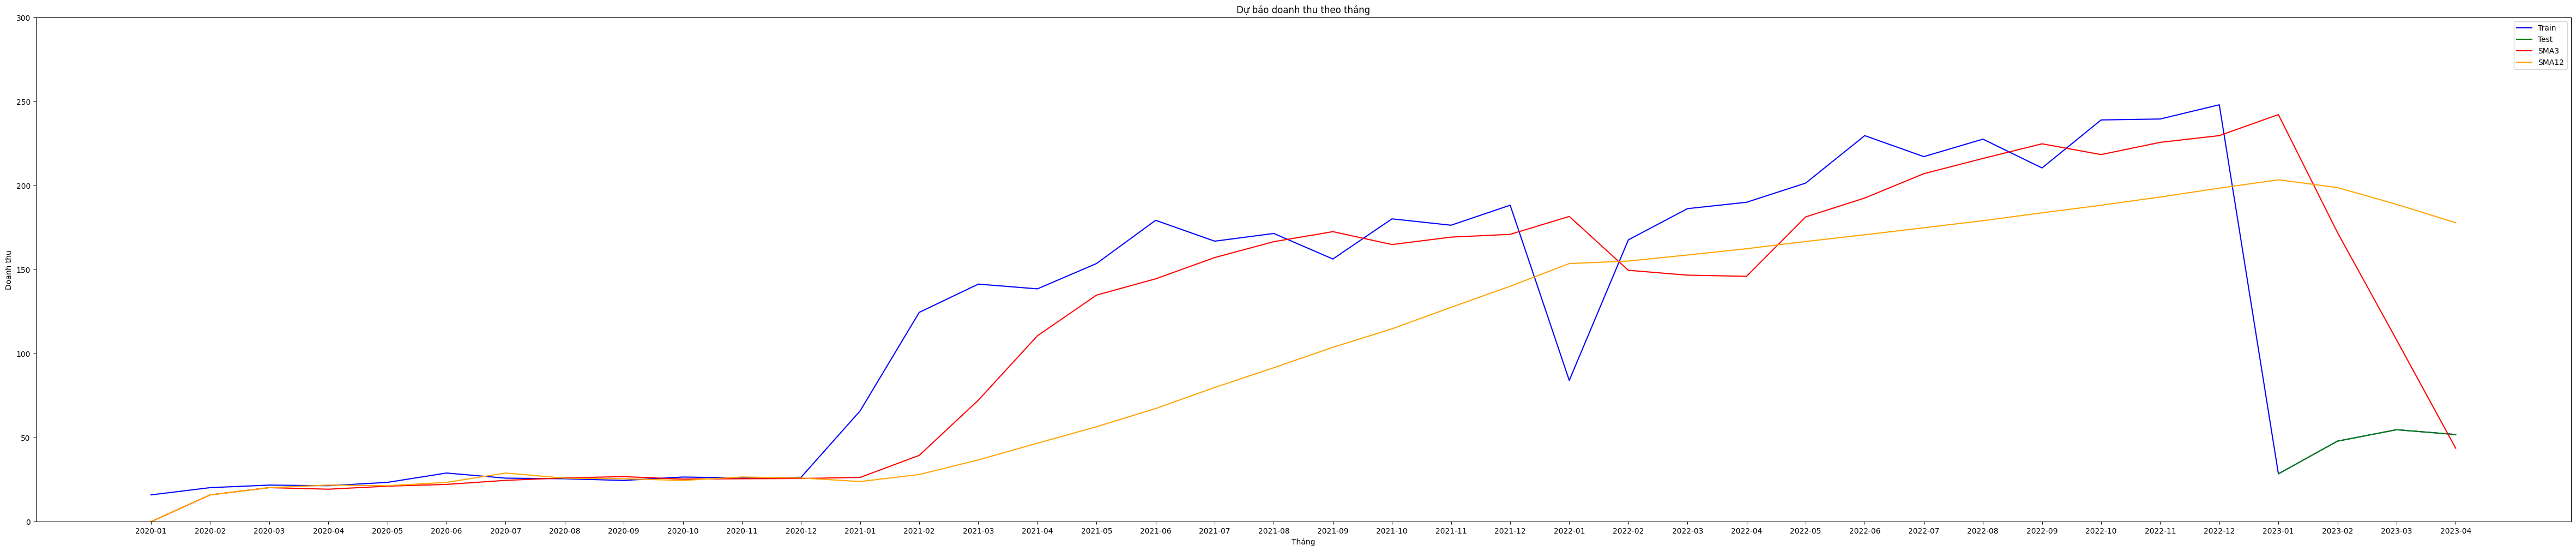

Train Size: 36
Test Size: 4
Window Size: 3
Train MSE: 18.300190611509503
Test MSE: 56.04043284064802
Window Size: 12
Train MSE: 43.61255213290336
Test MSE: 98.03568205655218


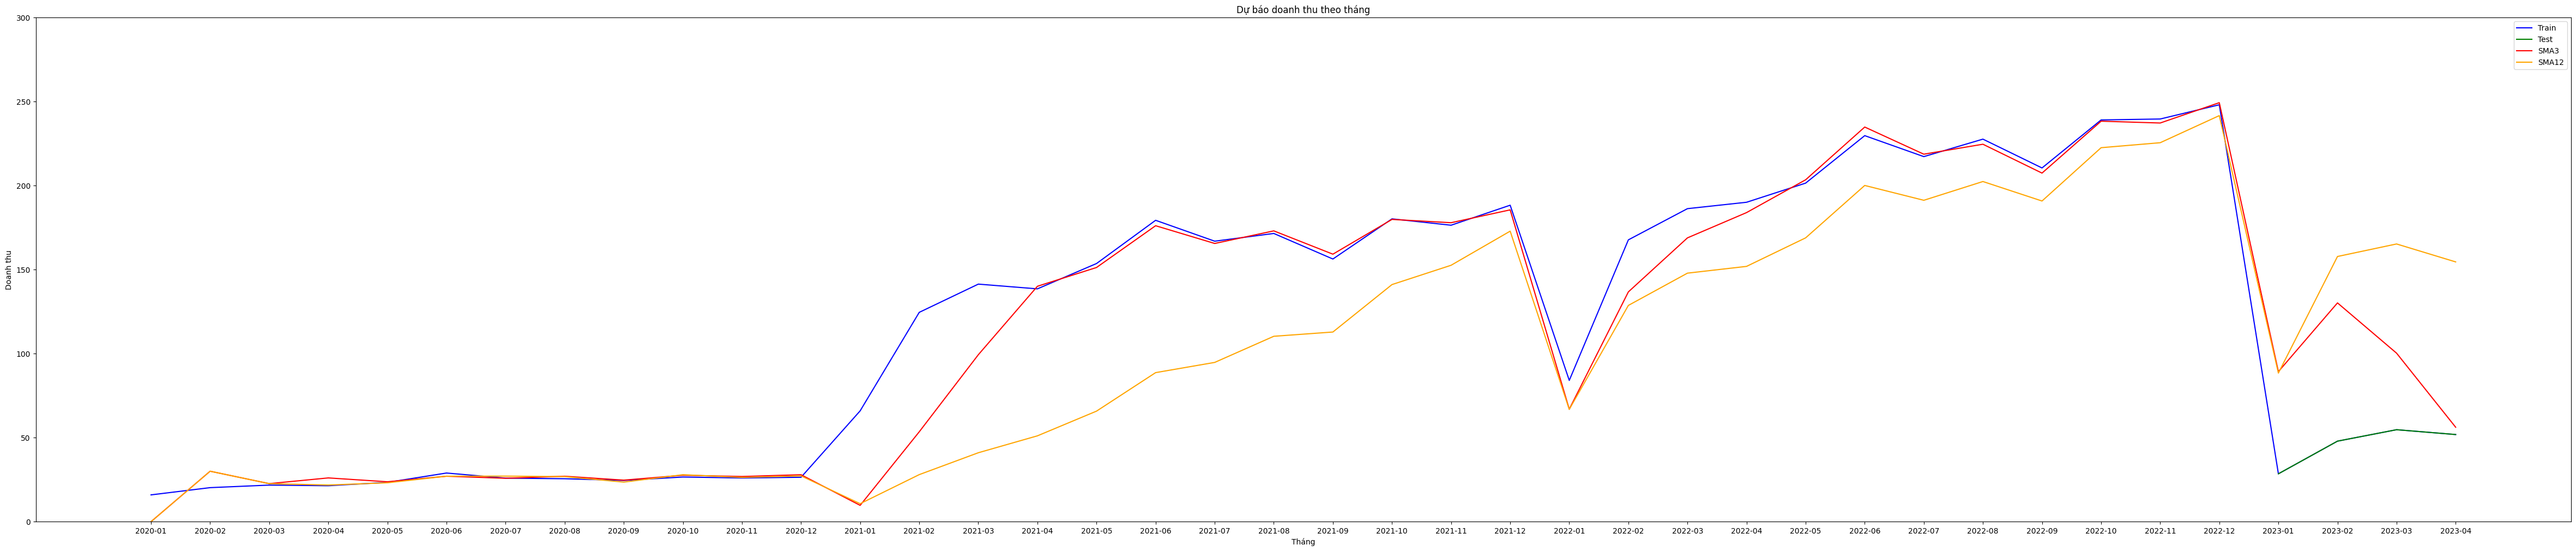

In [30]:
from numpy import mean

def sma_model(dataset):
    dataset = dataset.copy()
    dataset_size = len(dataset)
    dataset_y =  [dataset['t'][i] for i in range(dataset_size)]


    train = dataset[dataset['year'].isin([2020, 2021, 2022])]
    train_size = len(train)
    train_y = [train['t'][i] for i in range(train_size)]

    test = dataset[dataset['year'].isin([2023])]
    test = test.reset_index()
    test_size = len(test)
    test_y = [test['t'][i] for i in range(test_size)]

    print(f'Train Size: {train_size}')
    print(f'Test Size: {test_size}')

    # print(train.head())
    # print(test.head())

    # train
    def train(window_size):
        history = list()
        forecasts = list()

        for t in range(dataset_size):
            length = len(history)
            if length >= window_size:
                forecast = mean([history[i] for i in range(length - window_size, length)])
            elif t > 0:
                forecast = dataset_y[t-1]
            else:
                forecast = 0

            forecasts.append(forecast)
            history.append(dataset_y[t])

        forecast = pd.DataFrame(forecasts)
        forecast.columns = ['t_forecast']
        forecast = pd.concat([dataset, forecast], axis=1)

        if 'seasonal_factor' in forecast.columns:
            forecast['forecast'] = forecast['t_forecast'] * forecast['seasonal_factor']
        else:
            forecast['forecast'] = forecast['t_forecast']

        forecast['forecast'] = forecast['forecast'].fillna(0)
        print(f'Window Size: {window_size}')
        mse = sqrt(mean_squared_error(forecast['actual'][0: train_size], forecast['forecast'][0: train_size]))
        print(f'Train MSE: {mse}')
        mse = sqrt(mean_squared_error(forecast['actual'][train_size : train_size + test_size], forecast['forecast'][train_size : train_size + test_size]))
        print(f'Test MSE: {mse}')

        return forecast

    sma3 = train(3)
    # sma6 = train(6)
    sma12 = train(12)

    # vẽ biểu đồ
    fig, ax = plt.subplots(figsize=(60,12))
    actual_line = sns.lineplot(data=dataset, x='year_month', y='actual', label='Train',  color='blue')
    actual_line.legend()

    test_line = sns.lineplot(data=test, x='year_month', y='actual', label='Test',  color='green')
    test_line.legend()

    sma3_line = sns.lineplot(data=sma3, x='year_month', y='forecast', label='SMA3',  color='red')
    sma3_line.legend()

    # sma6_line = sns.lineplot(data=forecast, x='year_month', y='forecast', label='SMA6',  color='orange')
    # sma6_line.legend()

    sma12_line = sns.lineplot(data=sma12, x='year_month', y='forecast', label='SMA12',  color='orange')
    sma12_line.legend()

    ax.set_title('Dự báo doanh thu theo tháng')
    ax.set_xlabel('Tháng')
    ax.set_ylabel('Doanh thu')
    plt.ylim(0, 300)

    plt.show()
    # print(forecast.head())

sma_model(dataset)
sa_dataset = seasonally_adjusted_transform(dataset)
sma_model(sa_dataset)

# BƯỚC 3.4: PHƯƠNG PHÁP DỰ BÁO DUNG HÒA HÀM MŨ (EMA - EXPOENTIAL SMOOTHING)

# BƯỚC 3.5: PHƯƠNG PHÁP DỰ BÁO AUTOREGRESSION (AR)

X(t+1) = b0 + b1 \* X(t) + b2 \* X(t-1)

Train Size: 36
Test Size: 4
Coefficients: [14.54352596  0.66466745  0.24337083  0.05047491]
Train MSE: 25.741213423913603
Test MSE: 114.7166467817453


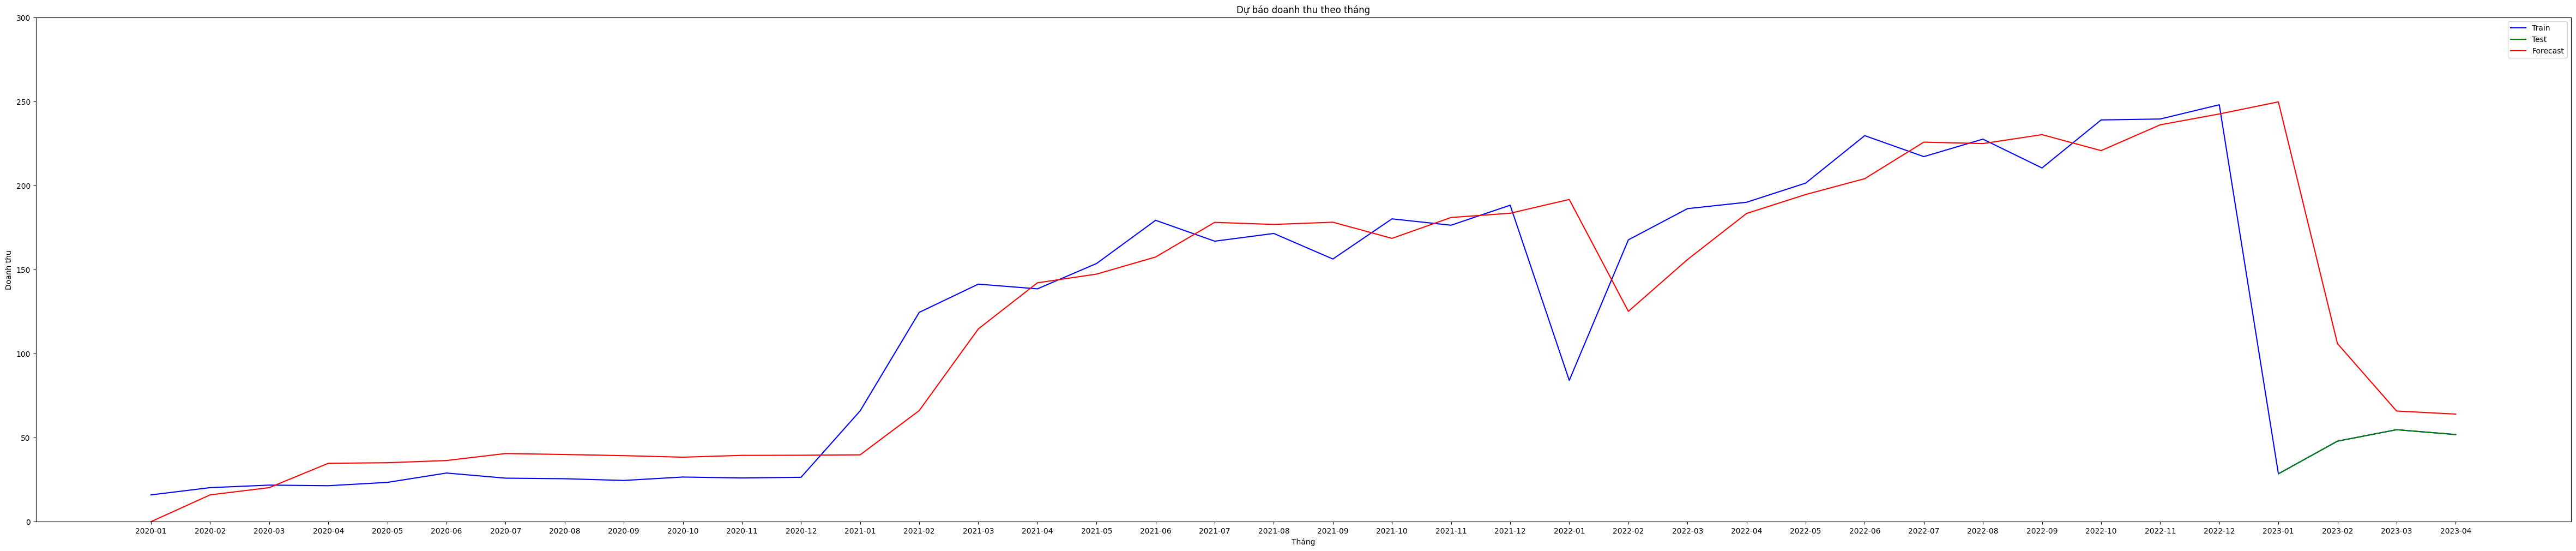

Train Size: 36
Test Size: 4
Coefficients: [ 1.43878662e+01  9.26879058e-01 -3.97681917e-03  9.33601702e-03]
Train MSE: 12.195929216427574
Test MSE: 32.194650850849385


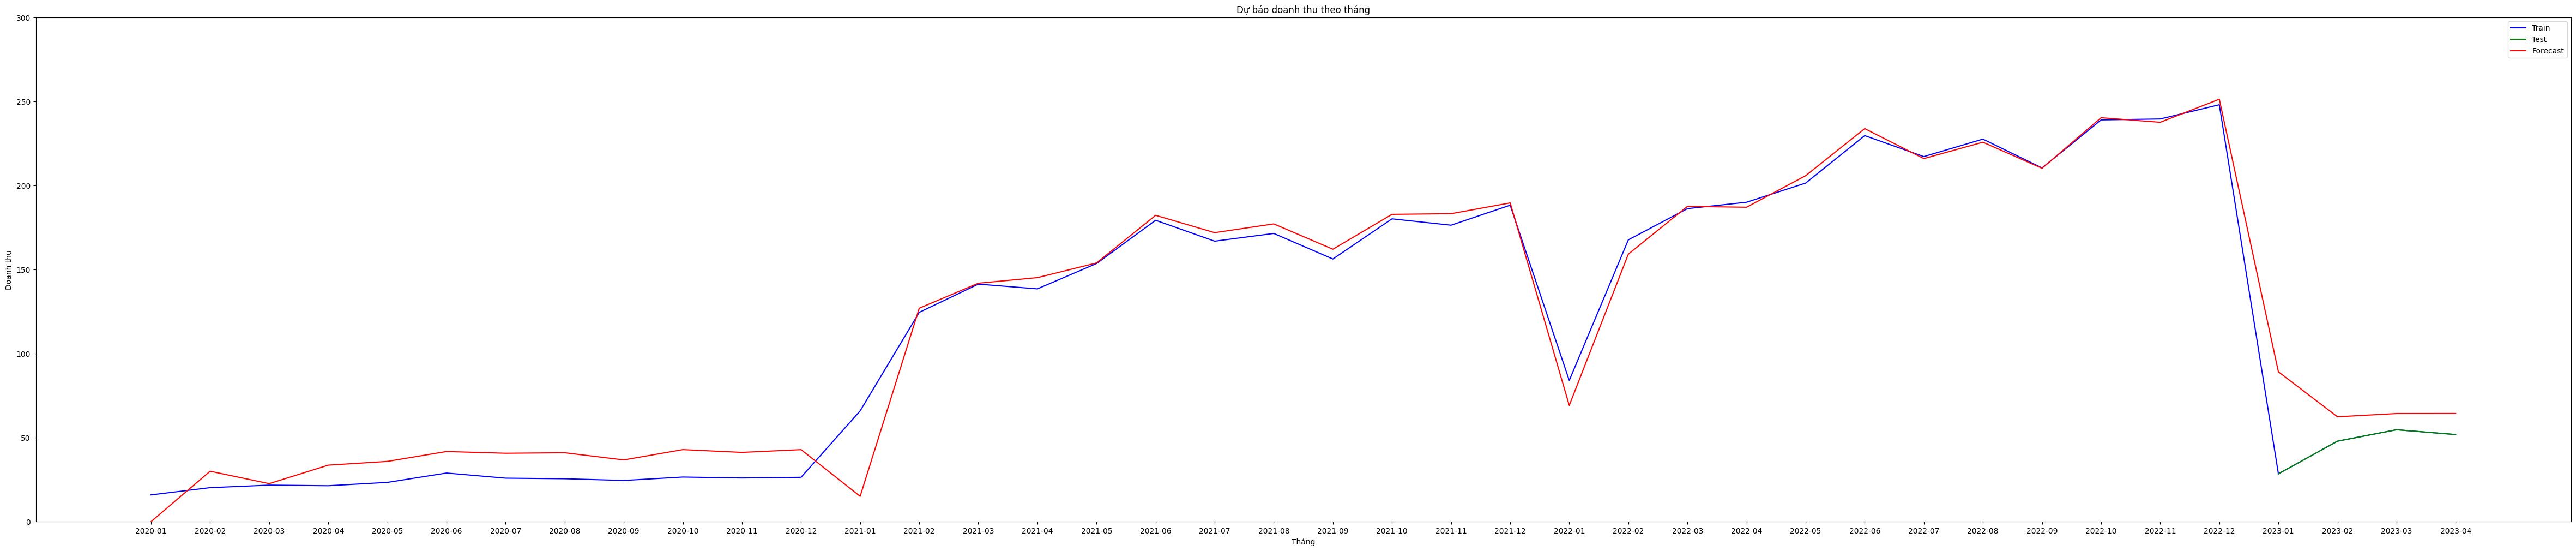

In [31]:
from statsmodels.tsa.ar_model import AutoReg
# from statsmodels.tsa.ar_model.AutoReg

def autoregression_model(dataset):
    dataset = dataset.copy()
    dataset_y =  [dataset['t'][i] for i in range(len(dataset))]
    dataset_size = len(dataset)

    train = dataset[dataset['year'].isin([2020, 2021, 2022])]
    train_size = len(train)
    train_y = [train['t'][i] for i in range(train_size)]

    test = dataset[dataset['year'].isin([2023])]
    test = test.reset_index()
    test_size = len(test)
    test_y = [test['t'][i] for i in range(test_size)]

    print(f'Train Size: {train_size}')
    print(f'Test Size: {test_size}')

    # print(train.head())
    # print(test.head())

    # train autoregression
    window_size = 3
    model = AutoReg(train_y, lags=window_size)
    model_fit = model.fit()
    coef = model_fit.params
    print('Coefficients: %s' % model_fit.params)

    # walk forward over time steps in train and test
    history = list()
    forecasts = list()

    for t in range(len(dataset_y)):
        length = len(history)
        if length >= window_size:
            lag = [history[i] for i in range(length - window_size, length)]
            forecast = coef[0]

            for d in range(window_size):
                forecast +=  coef[d + 1] * lag[window_size - d - 1]
        elif t > 0:
            forecast = dataset_y[t-1]
        else:
            forecast = 0

        forecasts.append(forecast)
        history.append(dataset_y[t])

    forecast = pd.DataFrame(forecasts)
    forecast.columns = ['t_forecast']
    forecast = pd.concat([dataset, forecast], axis=1)

    if 'seasonal_factor' in forecast.columns:
        forecast['forecast'] = forecast['t_forecast'] * forecast['seasonal_factor']
    else:
         forecast['forecast'] = forecast['t_forecast']

    forecast['forecast'] = forecast['forecast'].fillna(0)
    mse = sqrt(mean_squared_error(forecast['actual'][0: train_size], forecast['forecast'][0: train_size]))
    print(f'Train MSE: {mse}')
    mse = sqrt(mean_squared_error(forecast['actual'][train_size : train_size + test_size], forecast['forecast'][train_size : train_size + test_size]))
    print(f'Test MSE: {mse}')

    # vẽ biểu đồ
    fig, ax = plt.subplots(figsize=(60,12))
    actual_line = sns.lineplot(data=dataset, x='year_month', y='actual', label='Train',  color='blue')
    actual_line.legend()

    test_line = sns.lineplot(data=test, x='year_month', y='actual', label='Test',  color='green')
    test_line.legend()

    forecast_line = sns.lineplot(data=forecast, x='year_month', y='forecast', label='Forecast',  color='red')
    forecast_line.legend()

    ax.set_title('Dự báo doanh thu theo tháng')
    ax.set_xlabel('Tháng')
    ax.set_ylabel('Doanh thu')
    plt.ylim(0, 300)

    plt.show()
    # print(forecast.head())

autoregression_model(dataset)
sa_dataset = seasonally_adjusted_transform(dataset)
autoregression_model(sa_dataset)

# BƯỚC 3.6: PHƯƠNG PHÁP DỰ BÁO ARIMA

Train Size: 36
Test Size: 4
Train MSE: 26.642625590305514
Test MSE: 106.80856984804095


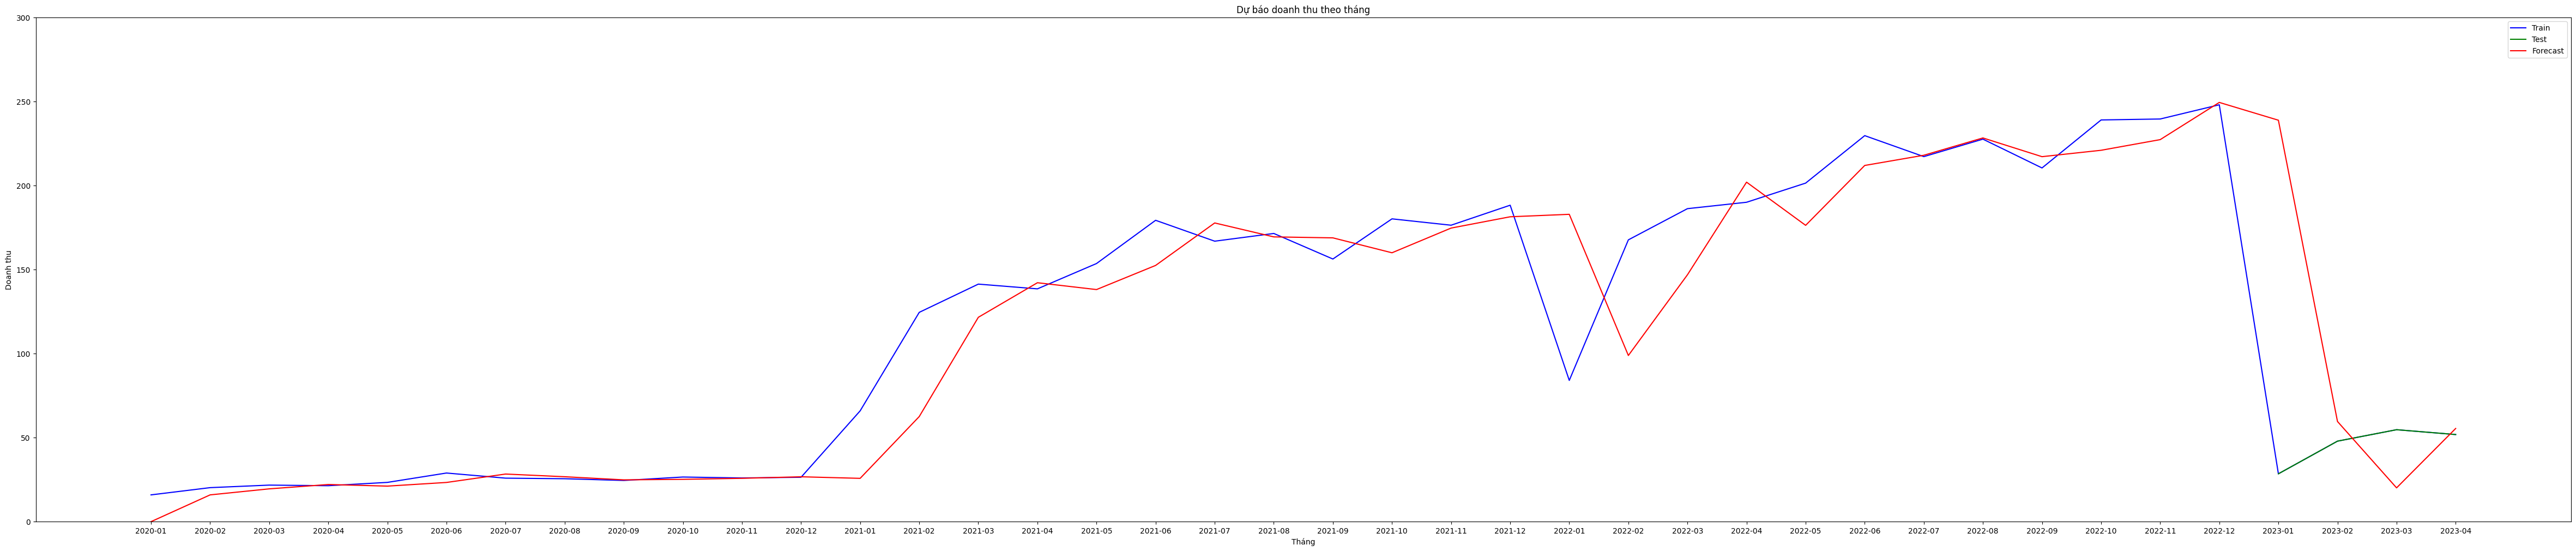

   year  month   end_date  sales  nb_orders year_month     t  actual  \
0  2020      1 2020-01-31  15.94       2213    2020-01 15.94   15.94   
1  2020      2 2020-02-29  20.25       3123    2020-02 20.25   20.25   
2  2020      3 2020-03-31  21.76       3503    2020-03 21.76   21.76   
3  2020      4 2020-04-30  21.40       3402    2020-04 21.40   21.40   
4  2020      5 2020-05-31  23.37       3647    2020-05 23.37   23.37   

   t_forecast  forecast  
0        0.00      0.00  
1       15.94     15.94  
2       19.52     19.52  
3       22.11     22.11  
4       21.15     21.15  
Train Size: 36
Test Size: 4
Train MSE: 10.584629737395304
Test MSE: 30.269982521253063


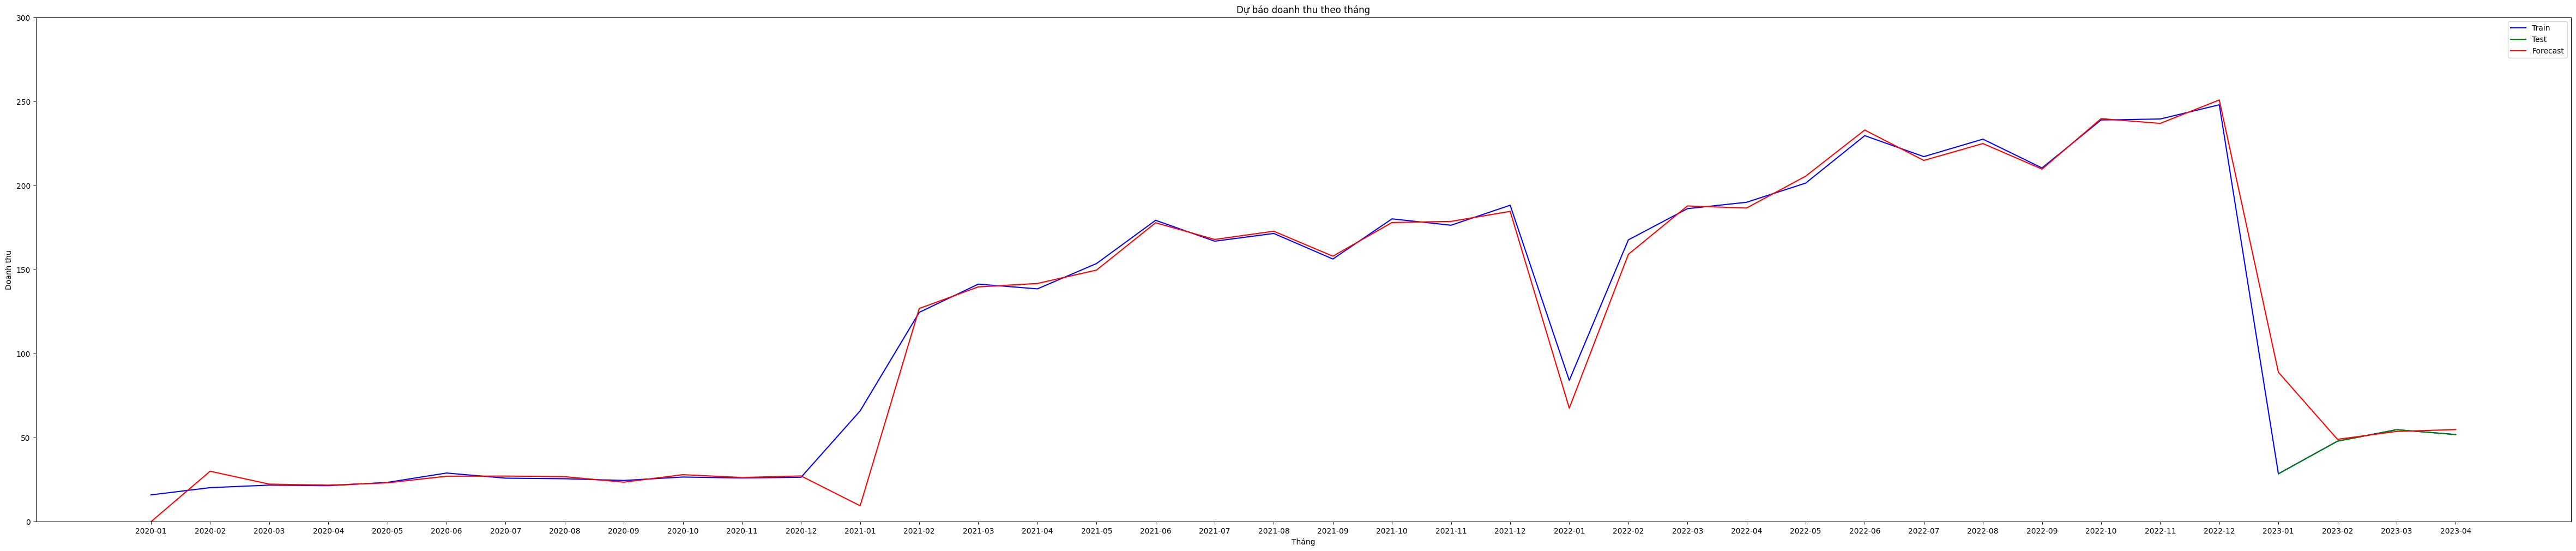

   year  month   end_date  sales  nb_orders year_month     t  actual  \
0  2020      1 2020-01-31  15.94       2213    2020-01 36.60   15.94   
1  2020      2 2020-02-29  20.25       3123    2020-02 24.68   20.25   
2  2020      3 2020-03-31  21.76       3503    2020-03 23.72   21.76   
3  2020      4 2020-04-30  21.40       3402    2020-04 23.29   21.40   
4  2020      5 2020-05-31  23.37       3647    2020-05 23.53   23.37   

   seasonal_factor   t-1  t_forecast  forecast  
0             0.44  0.00        0.00      0.00  
1             0.82 36.60       36.60     30.02  
2             0.92 24.68       24.38     22.36  
3             0.92 23.72       23.65     21.73  
4             0.99 23.29       23.27     23.11  


In [32]:
from statsmodels.tsa.arima.model import ARIMA

def arima_model(dataset):
    dataset = dataset.copy()
    dataset_y =  [dataset['t'][i] for i in range(len(dataset))]
    dataset_size = len(dataset)

    train = dataset[dataset['year'].isin([2020, 2021, 2022])]
    train_size = len(train)
    train_y = [train['t'][i] for i in range(train_size)]

    test = dataset[dataset['year'].isin([2023])]
    test = test.reset_index()
    test_size = len(test)
    test_y = [test['t'][i] for i in range(test_size)]

    print(f'Train Size: {train_size}')
    print(f'Test Size: {test_size}')

    p_values = [0, 1, 2, 4, 6, 8, 10]
    d_values = range(0, 3)
    q_values = range(0, 3)

    def train():
        history = train_y
        arima_order = (1, 1, 1)

        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        forecasts = list(model_fit.predict())

        for t in range(test_size):
            model = ARIMA(history, order=arima_order)
            model_fit = model.fit()

            output = model_fit.forecast()
            forecast = output[0]

            forecasts.append(forecast)
            history.append(test_y[t])

        forecast = pd.DataFrame(forecasts)
        forecast.columns = ['t_forecast']
        forecast = pd.concat([dataset, forecast], axis=1)

        if 'seasonal_factor' in forecast.columns:
            forecast['forecast'] = forecast['t_forecast'] * forecast['seasonal_factor']
        else:
            forecast['forecast'] = forecast['t_forecast']

        forecast['forecast'] = forecast['forecast'].fillna(0)
        mse = sqrt(mean_squared_error(forecast['actual'][0: train_size], forecast['forecast'][0: train_size]))
        print(f'Train MSE: {mse}')
        mse = sqrt(mean_squared_error(forecast['actual'][train_size : train_size + test_size], forecast['forecast'][train_size : train_size + test_size]))
        print(f'Test MSE: {mse}')

        return forecast

    forecast = train()

    # vẽ biểu đồ
    fig, ax = plt.subplots(figsize=(60,12))
    actual_line = sns.lineplot(data=dataset, x='year_month', y='actual', label='Train',  color='blue')
    actual_line.legend()

    test_line = sns.lineplot(data=test, x='year_month', y='actual', label='Test',  color='green')
    test_line.legend()

    forecast_line = sns.lineplot(data=forecast, x='year_month', y='forecast', label='Forecast',  color='red')
    forecast_line.legend()

    ax.set_title('Dự báo doanh thu theo tháng')
    ax.set_xlabel('Tháng')
    ax.set_ylabel('Doanh thu')
    plt.ylim(0, 300)

    plt.show()
    print(forecast.head())

arima_model(dataset)
sa_dataset = seasonally_adjusted_transform(dataset)
arima_model(sa_dataset)